# Sales Forecasting for SmallBasket

## Business Understanding

Online grocery is one of the biggest markets currently in the country. It has made life easier for working people, They have become one stop shop for all house hold items from eatables to cleaning utilities to sationary etc.
Its importatnt for a grocery retailer to be able to forecast the no of unit sales on specific items at specific locations to stock accordingly and to function smoothly across various divisions like supply chain and delivery.  

Small basket is an online grocery retailer found in 2011.To manage its supply chain and delivery partners Small basket is intrested to forecast the number of sales of a particular item from a particular location on a given date from the past data. We were asked to forecast the unit sales from 1st January 2019 to 15th January 2019 given previous years data and some additional data on the items,location and transactions per location on a given date. 

We can Acheive this by using Machine Learning Algorithms.Understand the data and convert the data as per the algorithms requirement and predict the required target. 

#### Agenda: 

1.The agenda is to build a model that can accurately forecast sales for small basket across several locations and product categories.

2.Get some menaingful inights from the data and help operations team to understand:

        1.Which cluster will have highest sales for first 15 days of 2019?
        2.What are the top 10 selling items in the cluster?
        3.What is the rate of purchase per week for these items?

In [1]:
### Load the required libraries
%matplotlib inline
import os
import numpy as np
import pandas as pd
#from google.colab import widgets
#import pandas_profiling
import pickle as pkl
import shutil
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from IPython.display import SVG
from IPython.display import display
import plotly.express as px 
import pickle as pkl
import shutil
from graphviz import Source
from PIL import Image 
import seaborn as sns
from scipy import stats
from scipy.stats import norm 

In [2]:
# To filter/truncate warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#loading data
#df_train=pd.read_csv(r"E:\PGPDataScience\PHD\train.csv")
#df_trainTransaction=pd.read_csv(r"E:\PGPDataScience\PHD\train_transactions.csv")
#df_item=pd.read_csv(r"E:\PGPDataScience\PHD\item_details.csv")
#df_location=pd.read_csv(r"E:\PGPDataScience\PHD\location_details.csv")

In [ ]:
#Loading Data
#df_train=pd.read_csv("train.csv")
#df_trainTransaction=pd.read_csv("train_transactions.csv")
#df_item=pd.read_csv("item_details.csv")
#df_location=pd.read_csv("location_details.csv")

In [8]:
#Setting path for pickle file
#PATH='/content/drive/My Drive/PHD_Insofe/Backup_Pkl'
PATH='E:\\PGPDataScience\\PHD\\Backups_pkl'
#if os.path.exists(PATH):
#  shutil.rmtree(PATH)
#os.mkdir(PATH)
print(os.getcwd())
os.chdir(PATH)
print(os.getcwd())

E:\PGPDataScience\PHD\EDA
E:\PGPDataScience\PHD\Backups_pkl


In [9]:
#Functions
#Function to load pickle file
def load_Pkl(filename,file):
  outfile=open(filename,'wb')
  pkl.dump(file,outfile)
  outfile.close()
  del outfile

#Function to open Pickel File
def open_Pkl(filename):
  infile=open(filename,'rb')
  loaded_pkl=pkl.load(infile)
  infile.close() 
  return(loaded_pkl)
  del infile,loaded_pkl

#Function to get datatypes,no. of NA's and no. of unique values
def Data_Analysis(data):
    print("Dimensions of the data")
    print(data.shape)
    Dtype    = data.dtypes
    NoOfNA   = data.isna().sum()
    Uniquevalues = data.astype('object').describe(include='all').loc['unique', :]
    Output = pd.DataFrame({"DataType":Dtype,"No Of NA's":NoOfNA,"No Of Unique Values":Uniquevalues})
    return(Output)
    del Dtype,NoOfNA,Uniquevalues,Output   

#Function to view all the unique levels in the data
def unique_levels(data):
  for x in data.columns:
    print(x)
    print(data[x].unique())
    del x

# Function to convert to categorical
def Convert_to_Cat(DF):
  cat_cols=DF.select_dtypes(include=["object"]).columns
  print(cat_cols)
  for col in cat_cols:
    DF[col]=DF[col].astype('str').astype('category')
  del cat_cols,col  

# Function to onvert to Date type
import datetime
def convert_to_date(DF):
  DF['date']=pd.to_datetime(DF['date'])
 
#Function to check the memory optimization
def usage_memory(DF):
  cols=DF.columns
  for i in cols:
    mem=DF[i].memory_usage(deep=True)
    print(i,mem)
  del i,mem  

#Function to replace the unique values of a cat column with its index for memory optimization
def map_idx_Cat(DF,cols):
  for col in cols:
    unique_values=DF[col].unique()
    mapping = {col: idx for
               idx, col in enumerate(unique_values, 1)}
    DF[col] = DF[col].map(mapping)
    
  
#Replace the strings from Cat columns for memory optimization
def cat_col_replace_value(DF,col_names,strings_to_replace):
  for col in col_names:
    for i in strings_to_replace:
      DF[col] = DF[col].str.replace(i,'')
  del col,col_names,i,strings_to_replace    



In [32]:
#load_Pkl('train',df_train)
#df_train=open_Pkl('train')

In [10]:
#Considering previous two years reacords
dt=['2018','2017']
df_train=df_train[df_train['date'].str.contains('|'.join(dt))]

df_trainTransaction=df_trainTransaction[df_trainTransaction['date'].str.contains('|'.join(dt))]
del dt

In [14]:
#Copy to pickle file
#load_Pkl('train_2017_2018',df_train)
#load_Pkl('transactions_2017_2018',df_trainTransaction)
#load_Pkl('item_wo_Conv',df_item)
#load_Pkl('location_wo_Conv',df_location)

In [10]:
#Loading pickle files
#df_train=open_Pkl('train_2017_2018')
#df_trainTransaction=open_Pkl('transactions_2017_2018')
df_item=open_Pkl('item_wo_Conv')
df_location=open_Pkl('location_wo_Conv')

In [22]:
print("-----------------------train---------------------------")
Data_Analysis(df_train)

Dimensions of the data
(63094515, 5)


,DataType,No Of NA's,No Of Unique Values
date,object,0,728
locationId,object,0,53
item_id,object,0,3887
unit_sales,float64,0,168589
onpromotion,object,0,2


In [23]:
print("-----------------------trainTransaction-------------------------")
Data_Analysis(df_trainTransaction)

-----------------------trainTransaction-------------------------
Dimensions of the data
(37345, 3)


,DataType,No Of NA's,No Of Unique Values
date,object,0,726
location_identifier,object,0,53
transactions,int64,0,4376


In [24]:
print("---------------------item_details---------------------")
Data_Analysis(df_item)


---------------------item_details---------------------
Dimensions of the data
(4100, 4)


,DataType,No Of NA's,No Of Unique Values
item_id,object,0,4100
category_of_item,object,0,30
class,object,0,337
perishable,int64,0,2


In [25]:
print("-----------------location_details---------------------")
Data_Analysis(df_location)

-----------------location_details---------------------
Dimensions of the data
(54, 5)


,DataType,No Of NA's,No Of Unique Values
location_id,object,0,54
city,object,0,22
state,object,0,13
type,object,0,5
cluster,int64,0,17


#### Type conversions

In [16]:
#train Dataset
Convert_to_Cat(df_train) #to convert all object to categorical
df_train['unit_sales']=df_train['unit_sales'].astype('float32')#reducing the int size to float32(memory optimization)
#convert_to_date(df_train)#to convert date column to datetime type


Index(['date', 'locationId', 'item_id', 'onpromotion'], dtype='object')


In [17]:
#train Transactions
Convert_to_Cat(df_trainTransaction)#to convert all object to categorical
df_trainTransaction['transactions']=df_trainTransaction['transactions'].astype('int32')#reducing the int size to int32(memory optimization)
#convert_to_date(df_trainTransaction) #to convert date column to datetime type

Index(['date', 'location_identifier'], dtype='object')


In [18]:
#item detials
Convert_to_Cat(df_item)#to convert all object to categorical
df_item['perishable']=df_item['perishable'].astype('str').astype('category')#to convert perishable form int to categorical


Index(['item_id', 'category_of_item', 'class'], dtype='object')


In [19]:
#location deatils
Convert_to_Cat(df_location)#to convert all object to categorical
df_location['cluster']=df_location['cluster'].astype('str').astype('category')#to convert perishable form int to categorical

Index(['location_id', 'city', 'state', 'type'], dtype='object')


In [20]:
#Check dtypes
print(df_train.dtypes)
print(df_trainTransaction.dtypes)
print(df_item.dtypes)
print(df_location.dtypes)

date           category
locationId     category
item_id        category
unit_sales      float16
onpromotion    category
dtype: object
date                   category
location_identifier    category
transactions              int32
dtype: object
item_id             category
category_of_item    category
class               category
perishable          category
dtype: object
location_id    category
city           category
state          category
type           category
cluster        category
dtype: object


#### Memory Optimization:

In [31]:
print("Memory allocation before optimization")
print("-----Memory usage for train-----")
usage_memory(df_train)
print("-----Memory usage for train transactions-----")
usage_memory(df_trainTransaction)
print("-----Memory usage for item details------")
usage_memory(df_item)
print("-----Memory usage for location details---")
usage_memory(df_location)

Memory allocation before optimization
-----Memory usage for train-----
date 630971454
locationId 567856790
item_id 631375816
unit_sales 630945150
onpromotion 567850838
-----Memory usage for train transactions-----
date 399738
location_identifier 342260
transactions 448140
-----Memory usage for item details------
item_id 453684
category_of_item 7653
class 41147
perishable 4424
-----Memory usage for location details---
location_id 6405
city 2235
state 1686
type 652
cluster 1816


In [21]:
#Handling Na's for onpromotions in train data
#df_train['onpromotion']=df_train['onpromotion'].fillna(method ='bfill')
#df_train['onpromotion'] = df_train['onpromotion'].cat.add_categories("others").fillna("others")
df_train['onpromotion']=df_train['onpromotion'].replace(['True'],1)
df_train['onpromotion']=df_train['onpromotion'].replace(['False'],0)
df_train['onpromotion']=df_train['onpromotion'].replace(['nan'],2)
print(df_train['onpromotion'].value_counts())
df_train['onpromotion']=df_train['onpromotion'].astype('str').astype('category')

0    58492656
1     4601859
Name: onpromotion, dtype: int64


In [22]:
#removing strings from cat columns to hold the meaningful information
cat_col_replace_value(df_train,['locationId','item_id'],['location_','item_'])
print(df_train.head())
cat_col_replace_value(df_trainTransaction,['location_identifier'],['location_'])
print(df_trainTransaction.head())
cat_col_replace_value(df_item,['item_id','class'],['item_','class_']) 
print(df_item.head())
cat_col_replace_value(df_location,['location_id'],['location_'])
print(df_location.head())

                date locationId item_id  unit_sales onpromotion
38594264  2017-01-01         25  103665        12.0           0
38594265  2017-01-01         25  105575        23.0           0
38594266  2017-01-01         25  108634         1.0           0
38594267  2017-01-01         25  108698         6.0           0
38594268  2017-01-01         25  108786         6.0           0
             date location_identifier  transactions
34046  2017-01-01                  25          2202
34047  2017-01-02                   1          1021
34048  2017-01-02                   2          1859
34049  2017-01-02                   3          3429
34050  2017-01-02                   4          1521
  item_id           category_of_item class perishable
0   96995              grocery_items  1093          0
1   99197              grocery_items  1067          0
2  103501         cleaning_utilities  3008          0
3  103520              grocery_items  1028          0
4  103665  baked_items / bread_bas

In [17]:
#Creating a dictionary for category_of_item,city,state,type for further use to map during EDA
cat_items=df_item['category_of_item'].unique().tolist()
city     =df_location['city'].unique().tolist()
state    =df_location['state'].unique().tolist()
type    =df_location['type'].unique().tolist()

dict_cat_items=dict(zip(list(range(1,len(cat_items))),cat_items))
dict_city     =dict(zip(list(range(1,len(city))),city))
dict_state    =dict(zip(list(range(1,len(state))),state))
dict_type     =dict(zip(list(range(1,len(type))),type))
#Create a pickle file for each dict
load_Pkl('dict_cat_items',dict_cat_items)
load_Pkl('dict_city',dict_city)
load_Pkl('dict_state',dict_state)
load_Pkl('dict_type',dict_type)

In [25]:
#Mapping the index to the unique level for the specified categorical variables Mappings provided in the mappings sheet
cols_items=['category_of_item']
map_idx_Cat(df_item,cols_items)
cols_loc=['city','state','type']
map_idx_Cat(df_location,cols_loc)
del cols_items,cols_loc 


In [28]:
print("Memory allocation after optimization")
print("-----Memory usage for train-----")
usage_memory(df_train)
print("-----Memory usage for train transactions-----")
usage_memory(df_trainTransaction)
print("-----Memory usage for item details------")
usage_memory(df_item)
print("-----Memory usage for location details---")
usage_memory(df_location)

Memory allocation after optimization
-----Memory usage for train-----
date 630971454
locationId 4214317076
item_id 4513582369
unit_sales 630945150
onpromotion 1009512240
-----Memory usage for train transactions-----
date 399738
location_identifier 2495598
transactions 448140
-----Memory usage for item details------
item_id 261144
category_of_item 5748
class 250228
perishable 4424
-----Memory usage for location details---
location_id 3305
city 998
state 926
type 382
cluster 1816


In [26]:
#Print d types
print(df_train.dtypes)
print(df_trainTransaction.dtypes)
print(df_item.dtypes)
print(df_location.dtypes)

date           category
locationId       object
item_id          object
unit_sales      float16
onpromotion    category
dtype: object
date                   category
location_identifier      object
transactions              int32
dtype: object
item_id               object
category_of_item    category
class                 object
perishable          category
dtype: object
location_id      object
city           category
state          category
type           category
cluster        category
dtype: object


In [27]:
#Convert all object to categorical
Convert_to_Cat(df_train)
Convert_to_Cat(df_trainTransaction)
Convert_to_Cat(df_item)
Convert_to_Cat(df_location)

Index(['locationId', 'item_id'], dtype='object')
Index(['location_identifier'], dtype='object')
Index(['item_id', 'class'], dtype='object')
Index(['location_id'], dtype='object')


In [28]:
#Check dtypes
print(df_train.dtypes)
print(df_trainTransaction.dtypes)
print(df_item.dtypes)
print(df_location.dtypes)

date           category
locationId     category
item_id        category
unit_sales      float16
onpromotion    category
dtype: object
date                   category
location_identifier    category
transactions              int32
dtype: object
item_id             category
category_of_item    category
class               category
perishable          category
dtype: object
location_id    category
city           category
state          category
type           category
cluster        category
dtype: object


In [29]:
#Taking a pickle copy
#load_Pkl('train_update',df_train)
#load_Pkl('transactions_update',df_trainTransaction)
#load_Pkl('item_update',df_item)
#load_Pkl('location_update',df_location)

In [30]:
#Loading from pickle copy
df_train=open_Pkl('train_update')
df_trainTransaction=open_Pkl('transactions_update')
df_item=open_Pkl('item_update')
df_location=open_Pkl('location_update')

In [31]:
#observed that there are 728 unique date values in train and only 726 unique date records in train transaction.
#check the count of records for those particular dates  
print(df_train['date'].isin(df_trainTransaction['date']).value_counts())
print(list(set(df_train['date'].unique()) - set(df_trainTransaction['date'].unique())))

True     62992427
False      102088
Name: date, dtype: int64
['2018-01-01', '2018-01-03']


In [7]:
#To check if all the location ID in train are present in train transactions
print(df_train['locationId'].isin(df_trainTransaction['location_identifier']).value_counts())
print(list(set(df_train['locationId'].unique()) - set(df_trainTransaction['location_identifier'].unique())))

True    63094515
Name: locationId, dtype: int64
[]


In [9]:
#To check if any date has more and 53 records.If they have they are duplicate records
x=df_trainTransaction.groupby('date').agg({
    'date':'nunique',
    'location_identifier': "count"
})
print(x.sort_values('location_identifier'))
del x

            date  location_identifier
date                                 
2017-01-01     1                    1
2018-01-04     1                   14
2018-01-02     1                   36
2017-01-26     1                   48
2017-01-27     1                   48
...          ...                  ...
2018-03-03     1                   53
2018-03-02     1                   53
2018-03-13     1                   53
2018-12-31     1                   53
2018-02-28     1                  106

[726 rows x 2 columns]


In [32]:
#As we can see there are duplicate records for 2018-02-28	date in transactions.lets take a sum of those records for each location
y=df_trainTransaction.copy()
indexNames=df_trainTransaction[df_trainTransaction['date']=="2018-02-28"].index
df_trainTransaction=df_trainTransaction.drop(indexNames)
print(df_trainTransaction.shape)

(37239, 3)


In [33]:
#handling the duplicate records
x=y[y['date']=="2018-02-28"]
print(x.shape)
z=x.groupby(['location_identifier'])['transactions'].sum().reset_index()
print(z.shape)
x['date'] = '2018-02-28'
df_trainTransaction=z.append(df_trainTransaction)
print(df_trainTransaction.shape)
del x,y,z

(106, 3)
(53, 2)
(37292, 3)


#### Merging all datasets

In [34]:
#Merging train with item details
train_item=df_train.join(df_item.set_index(['item_id']), on=['item_id'])
print (train_item.shape)
print(train_item.isna().sum())

(63094515, 8)
date                0
locationId          0
item_id             0
unit_sales          0
onpromotion         0
category_of_item    0
class               0
perishable          0
dtype: int64


In [35]:
#Merging train,item details with location
train_item_location=train_item.join(df_location.set_index(['location_id']), on=['locationId'])
print (train_item_location.shape)
print(train_item_location.isna().sum())
del train_item

(63094515, 12)
date                0
locationId          0
item_id             0
unit_sales          0
onpromotion         0
category_of_item    0
class               0
perishable          0
city                0
state               0
type                0
cluster             0
dtype: int64


In [37]:
#Merging train,item details,location with train transactions
data=train_item_location.join(df_trainTransaction.set_index(['date','location_identifier']), on=['date','locationId'])
print (data.shape)
print(data.isna().sum())
del train_item_location

(63094515, 13)
date                     0
locationId               0
item_id                  0
unit_sales               0
onpromotion              0
category_of_item         0
class                    0
perishable               0
city                     0
state                    0
type                     0
cluster                  0
transactions        403758
dtype: int64


In [38]:
#drop NA from data.We got NA's because there are 728 date records in train data and only 726 records on transactions data.We
#are doing a left join so we will get NA's and also no all dates in train transactions have all 53 location transactions.
data=data.dropna()

In [40]:
#convert date to datetime
convert_to_date(data)
data['transactions']=data['transactions'].astype('int32')#reducing the int size to int32(memory optimization)

In [41]:
data.head()

,date,locationId,item_id,unit_sales,onpromotion,category_of_item,class,perishable,city,state,type,cluster,transactions
38594264,2017-01-01,25,103665,12.0,0,3,2712,1,11,4,1,1,2202
38594265,2017-01-01,25,105575,23.0,0,1,1045,0,11,4,1,1,2202
38594266,2017-01-01,25,108634,1.0,0,1,1075,0,11,4,1,1,2202
38594267,2017-01-01,25,108698,6.0,0,4,2644,1,11,4,1,1,2202
38594268,2017-01-01,25,108786,6.0,0,2,3044,0,11,4,1,1,2202


In [5]:
#loading a pickle file for merged data
#load_Pkl('Merge_Data_date',data)
data=open_Pkl('Merge_Data_date')

In [7]:
#extracting features from date
data['month']    =data['date'].dt.month
data['dayofweek']=data['date'].dt.dayofweek
data['year']     =data['date'].dt.year
data['quarter']  =data['date'].dt.quarter
data['week']     =data['date'].dt.week

#converting int64 to int8 to reduce memory
L=['month','dayofweek','quarter','week'] #dayofweek Mon-Sun ->0-6
for i in L:
    data[i]=data[i].astype('int8')
del L,i 
#convert year to int16
data['year']=data['year'].astype('int16')

#drop data column after extracting all required information from date
data=data.drop(['date'], axis = 1)

In [6]:
#loading final merged data into picle file
#load_Pkl('Merge_Data_final',data)
data=open_Pkl('Merge_Data_final')

In [13]:
data.head()

,locationId,item_id,unit_sales,onpromotion,category_of_item,class,perishable,city,state,type,cluster,transactions,month,dayofweek,year,quarter,week
38594264,25,103665,12.0,0,3,2712,1,11,4,1,1,2202,1,6,2017,1,52
38594265,25,105575,23.0,0,1,1045,0,11,4,1,1,2202,1,6,2017,1,52
38594266,25,108634,1.0,0,1,1075,0,11,4,1,1,2202,1,6,2017,1,52
38594267,25,108698,6.0,0,4,2644,1,11,4,1,1,2202,1,6,2017,1,52
38594268,25,108786,6.0,0,2,3044,0,11,4,1,1,2202,1,6,2017,1,52


In [76]:
data.shape

(62690757, 16)

In [14]:
#handling Inf values in the data
data= data.replace([np.inf, -np.inf], np.nan)

#Drop na's
data=data.dropna()

In [17]:
#loading final merged data into picle file
load_Pkl('Merge_Data_date_WoInf',data)
#data=open_Pkl('Merge_Data_final_WoInfl')

### Test Data Preprocessing

In [5]:
#loading data
test=pd.read_csv(r"E:\PGPDataScience\PHD\test.csv")

In [6]:
print("Test data specifics \n",Data_Analysis(test))


Dimensions of the data
(1482295, 5)
Test data specifics 
             DataType  No Of NA's No Of Unique Values
id             int64           0             1482295
date          object           0                  15
locationId    object           0                  53
item_id       object           0                3828
onpromotion     bool           0                   2


In [7]:
#replacing true with 1 and False with 0
test['onpromotion']=test['onpromotion'].replace(['True'],1)
test['onpromotion']=test['onpromotion'].replace(['False'],0)
test['onpromotion']=test['onpromotion'].astype('str').astype('category')

In [8]:
#removing strings from cat columns to hold the meaningful information
cat_col_replace_value(test,['locationId','item_id'],['location_','item_'])
print(test.head())

   id        date locationId item_id onpromotion
0   0  2019-01-01         25   99197       False
1   1  2019-01-01         25  103665       False
2   2  2019-01-01         25  105574       False
3   3  2019-01-01         25  105857       False
4   4  2019-01-01         25  106716       False


In [9]:
Convert_to_Cat(test)#to convert all object to categorical

Index(['date', 'locationId', 'item_id'], dtype='object')


In [10]:
test.dtypes

id                int64
date           category
locationId     category
item_id        category
onpromotion    category
dtype: object

In [11]:
test=test.set_index('id')# Set ID as index

In [13]:
test.head()

,date,locationId,item_id,onpromotion
id,,,,
0,2019-01-01,25,99197,False
1,2019-01-01,25,103665,False
2,2019-01-01,25,105574,False
3,2019-01-01,25,105857,False
4,2019-01-01,25,106716,False


In [14]:
#Taking a pickle copy
load_Pkl('test_date',test)

# EDA

In [10]:
#Getting pickled final data file
data=open_Pkl('Merge_Data_final_WoInf')

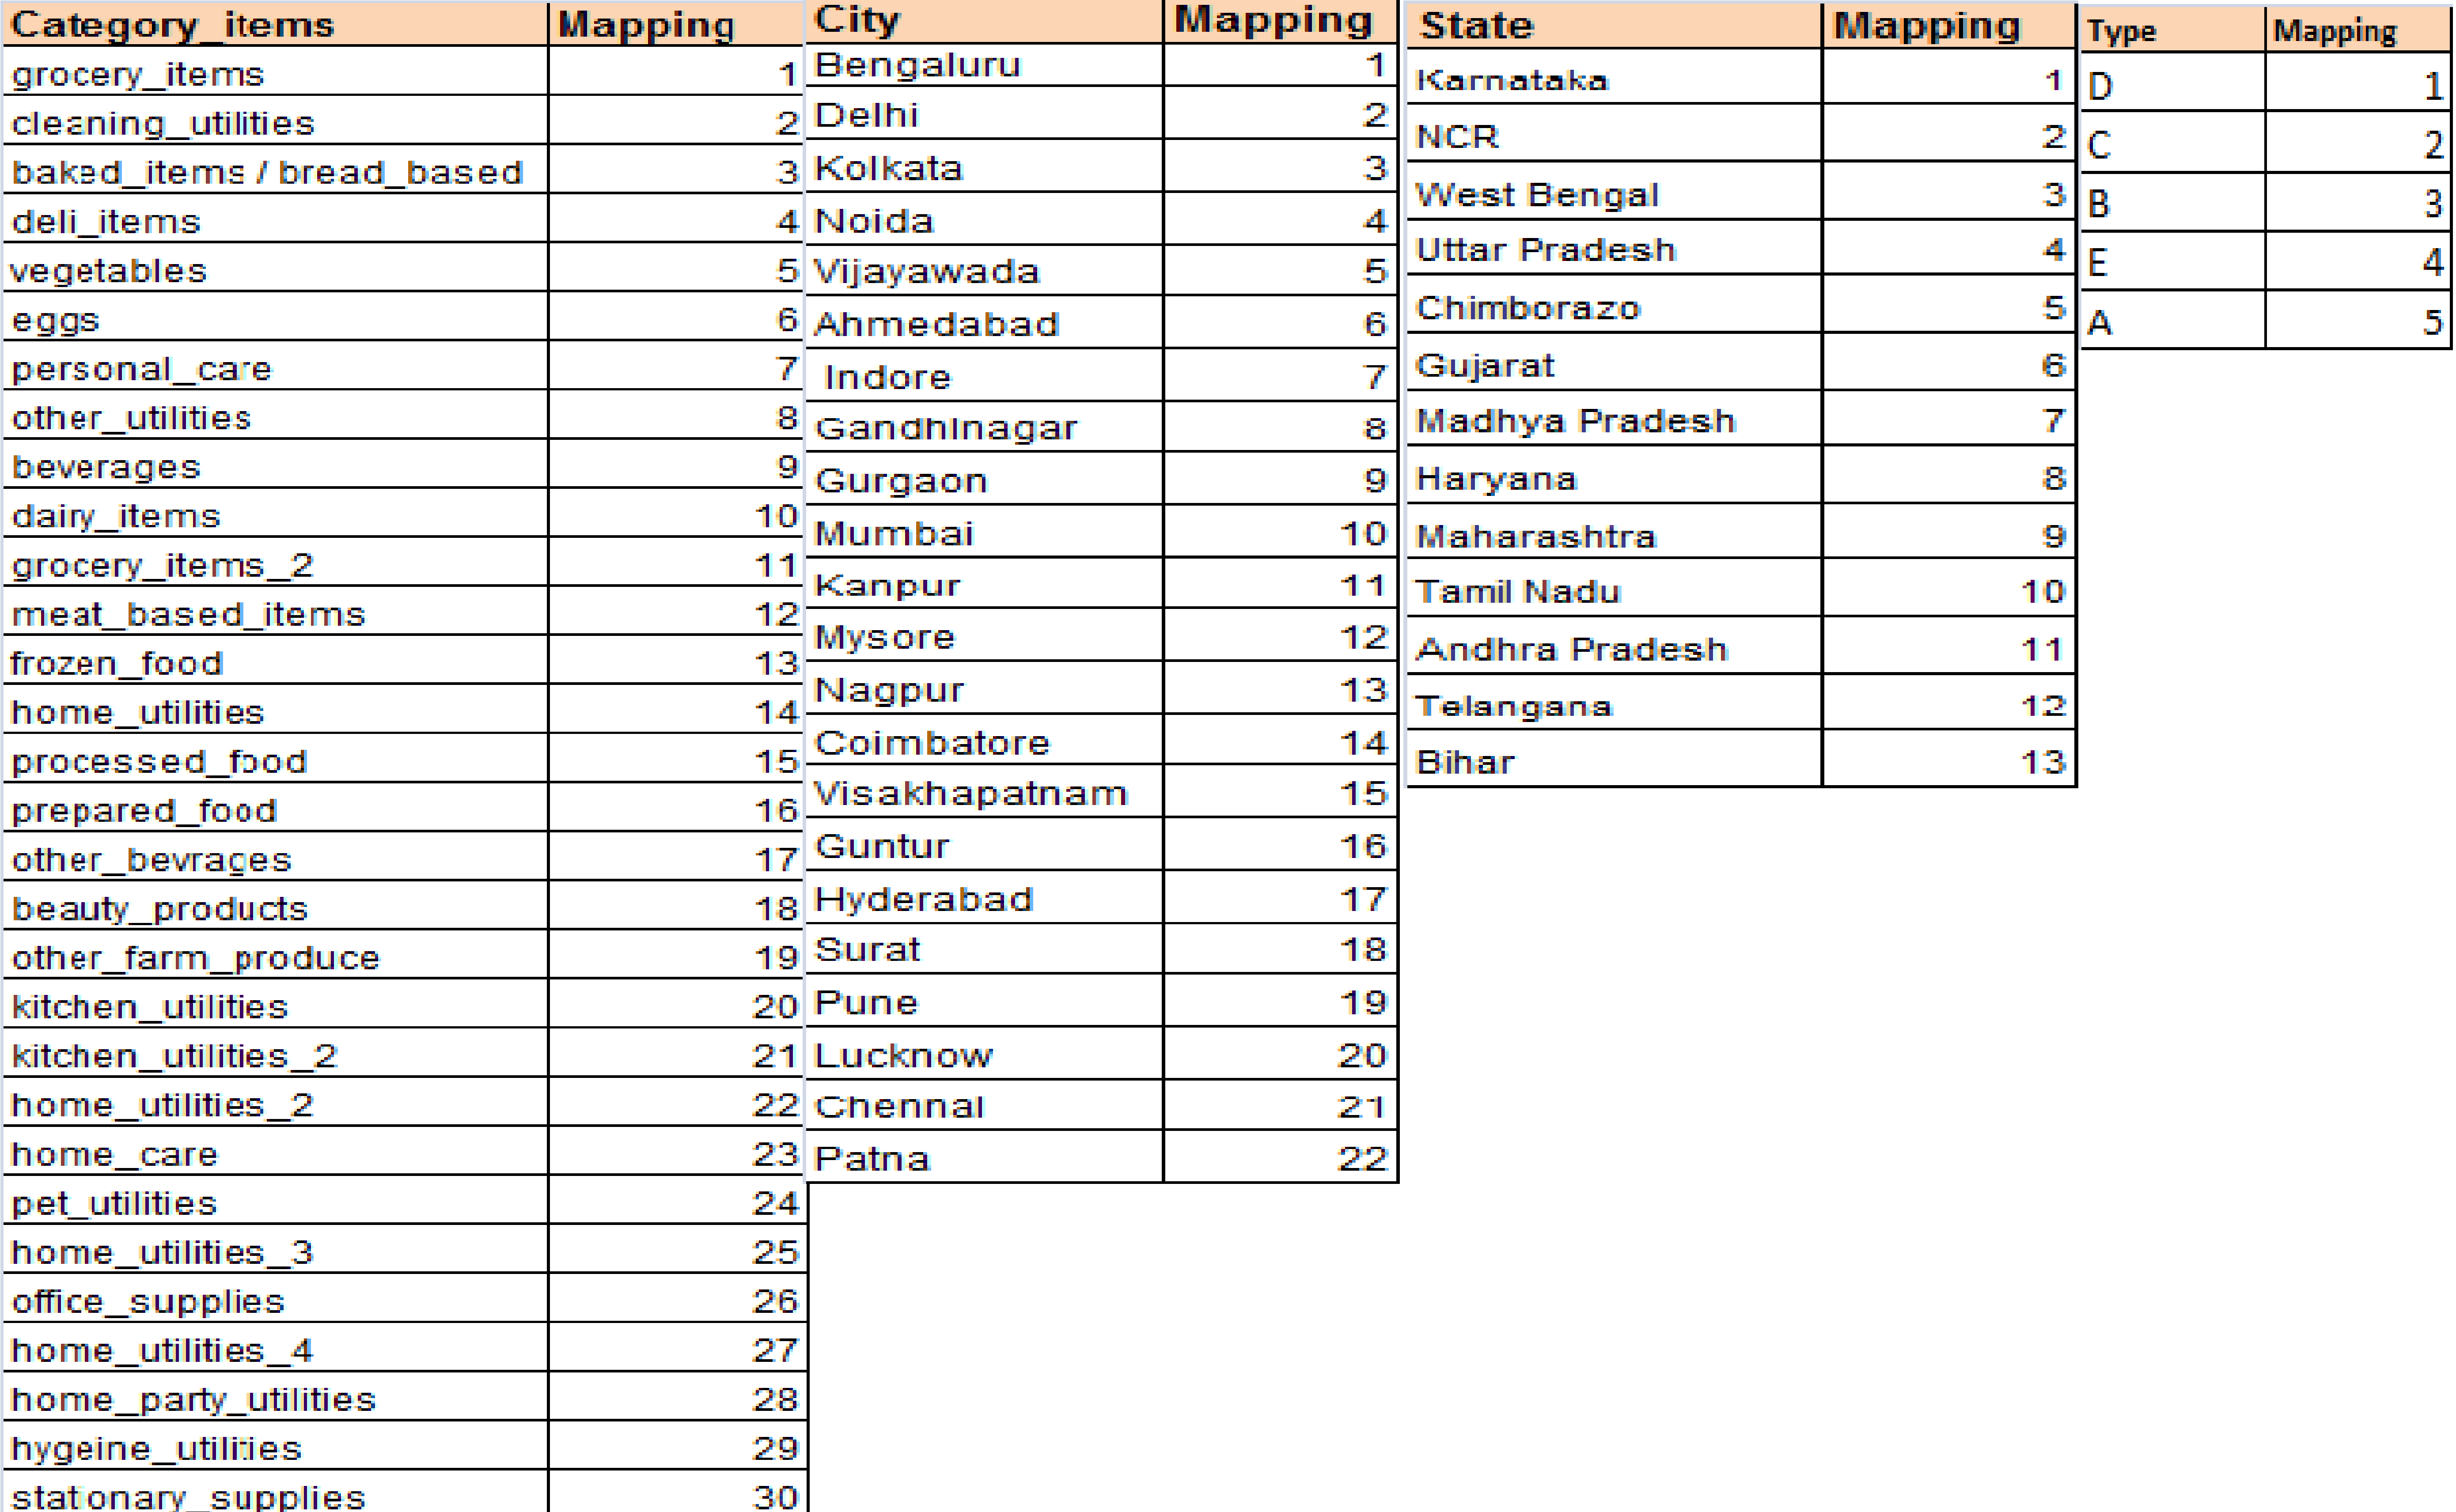

In [6]:
#mappings for Category_item,state,city,type whose values are replaced by the idicies obtained from the taking the unique values
#of these columns into an array.We have done this to reduce memory
#Refer to the mappings for interpreting the corresponding values
img = Image.open("Mapping.png")
img

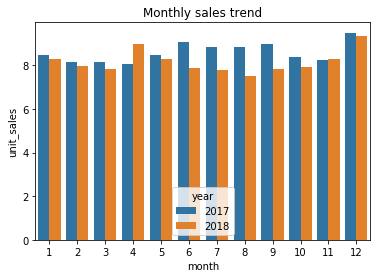

In [32]:
#Average montly sales trend for 2017 and 2018
data_monthSales=data.groupby(['month','year'])['unit_sales'].mean().reset_index()
sns.barplot(x='month',y='unit_sales',hue='year',data=data_monthSales)
plt.title("Monthly sales trend")
del data_monthSales

##### Observation:

    1.Average sales are more in 2017 compared to 2018 during the mid year

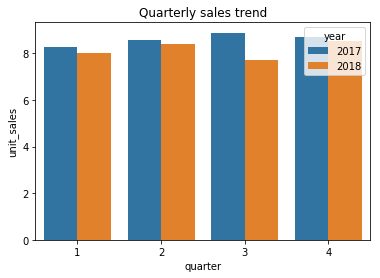

In [34]:
#Average quaterly sales trend for 2017 and 2018
data_quarter=data.groupby(['year','quarter'])['unit_sales'].mean().reset_index()
sns.barplot(x='quarter',y='unit_sales',hue='year',data=data_quarter)
plt.title("Quarterly sales trend")
del data_quarter

##### observation:
    1.sales in quarter 3 droped in 2018 while they have slightly increased in 2017 during the same quarter.
    2.Over all sales have been less in 2018 compared to 2017 in all the quarters
    3.Its evident from quarter sales that sales in 2018 decreased compared to 2017

Text(0.5,1,'daily sales trend')

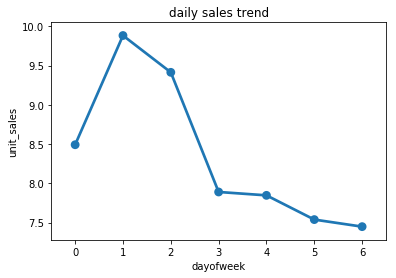

In [31]:
#to check the sales trend on weekdays and weekends mon-sun(0-6)
data_daySales=data.groupby(['dayofweek'])['unit_sales'].mean().reset_index()
sns.pointplot(x='dayofweek',y='unit_sales',data=data_daySales)
plt.title("daily sales trend")
del data_daySales

##### Mapping:
    Monday-Sunday----->0-6
##### Expectation:
    There would be more sales during weekends.
##### Observation:
    The sales are more on monday,tuesday,wednesday compared to other dyas.
 

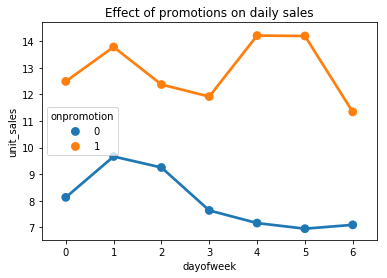

In [258]:
#Check if the transactions are more on promotion items.
data_daySales_prom=data.groupby(['dayofweek','onpromotion'])['unit_sales'].mean().reset_index()
sns.pointplot(x='dayofweek',y='unit_sales',hue='onpromotion',data=data_daySales_prom)
plt.title("Effect of promotions on daily sales")
del data_daySales_prom

##### Observation:
    As observerd earlier avgs sales are less during week ends.From this plot we can observe that most sales on the weekends correspond to promotion items.

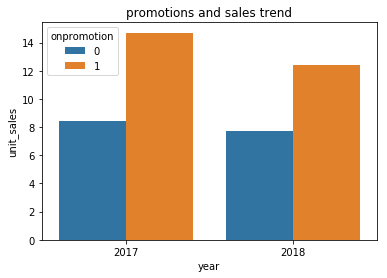

In [38]:
#Check the effect of promotions on sales
data_prom=data.groupby(['onpromotion','year'])['unit_sales'].mean().reset_index()
sns.barplot(x='year',y='unit_sales',hue='onpromotion',data=data_prom)
plt.title("promotions and sales trend")
del data_prom

##### Observation:
    As expected average sales are more during promotions. 

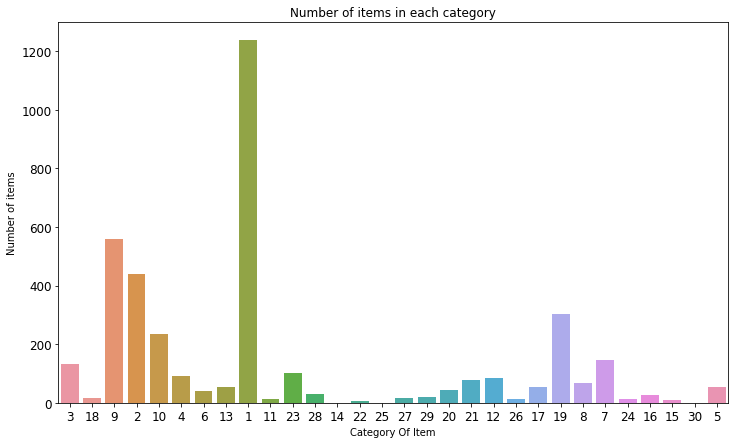

In [9]:
#Checking how many item_id's are present per each category item -->Distribution of no of itemsin each categories
data_items=data.groupby('category_of_item').agg({
    'item_id':'nunique',
    'category_of_item': "unique"
})
plt.figure(figsize=(12,7))
fig=sns.barplot(x=data_items.index,y=data_items.item_id)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Number of items")
plt.xlabel("Category Of Item")
plt.title("Number of items in each category")
plt.show(fig)
del data_items

##### Observations:
    1. 1-->grocery_items has approximately 1200 items
    2. 2-->cleaning_utilities has approximately 420 items
    3. 9-->beverages has approximately 590 items

##### Note: Refer to mappings image pasted above to understand the category of the item.

In [15]:
#Check top 10 items with highest sales
data_items=data.groupby(['category_of_item'])['unit_sales'].mean().reset_index()
data_items=data_items.sort_values('unit_sales',ascending=False)
data_items=data_items.head(10)


In [16]:
data_items

,category_of_item,unit_sales
29,5,17.234375
22,19,16.812500
19,12,12.234375
2,9,11.992188
26,16,10.648438
6,6,9.929688
7,13,9.375000
0,3,8.828125
27,15,7.636719
8,1,7.234375


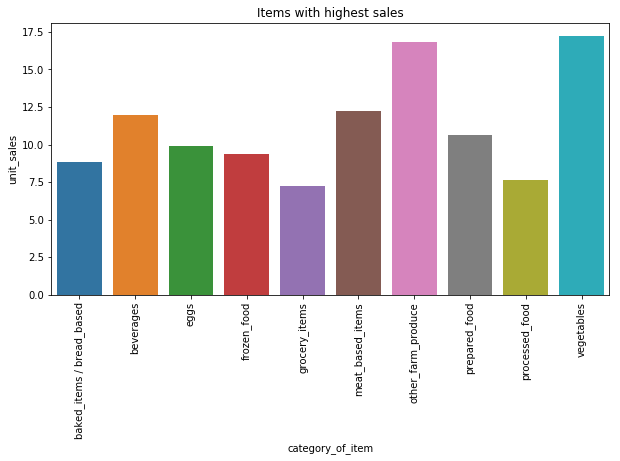

In [17]:
data_items['category_of_item'] = data_items.category_of_item.cat.rename_categories({5 : 'vegetables',
                                                                                    19: 'other_farm_produce', 
                                                                                    12: 'meat_based_items',
                                                                                    9 : 'beverages',
                                                                                    16: 'prepared_food',
                                                                                    6 : 'eggs',
                                                                                    13: 'frozen_food',
                                                                                    3 : 'baked_items / bread_based',
                                                                                    15: 'processed_food',
                                                                                    1 : 'grocery_items'})  
data_items['category_of_item'] = data_items.category_of_item.cat.remove_unused_categories()

plt.figure(figsize=(10,5))
fig=sns.barplot(x='category_of_item',y='unit_sales',data=data_items)
plt.title("Items with highest sales")
fig=fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
del data_items

##### Observation:
    Vegetables,other farm produce,meant based items,beverages and eggs are highest units sales in small basket.

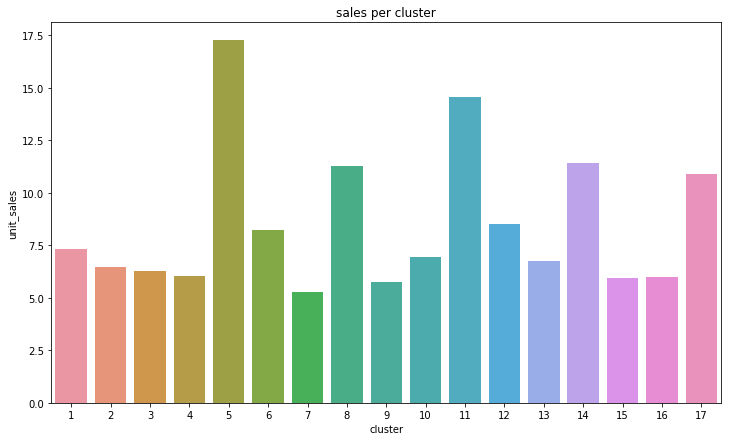

In [117]:
#to check which cluster has highest sales sales
data_cluster=data.groupby(['cluster'])['unit_sales'].mean().reset_index()
data_cluster['cluster']=data_cluster['cluster'].astype('int8')
data_cluster=data_cluster.sort_values('cluster')
plt.figure(figsize=(12,5))
sns.barplot(x='cluster',y='unit_sales',data=data_cluster)
plt.title("sales per cluster")
del data_cluster

##### Observation:
    On an average cluster 5 has highest sales.

In [41]:
#to check top 10 selling items under cluster 5
data_topitems_cluster=data[ (data['cluster']=='5')]
data_cluster_top=data_topitems_cluster.groupby(['category_of_item'])['unit_sales'].mean().reset_index()
data_cluster_top=data_cluster_top.sort_values('unit_sales',ascending=False)

data_cluster_top=data_cluster_top.head(10)
data_cluster_top

,category_of_item,unit_sales
22,19,49.218750
29,5,32.906250
26,16,31.718750
2,9,26.828125
6,6,21.250000
7,13,19.578125
19,12,18.750000
27,15,18.093750
0,3,16.625000
4,10,15.484375


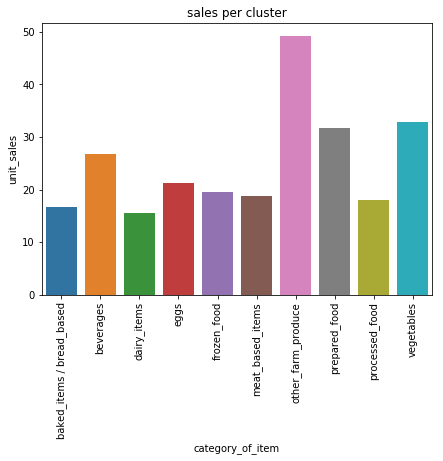

In [43]:
#renaming the category to corresponding mapping for better understanding.Refer yo mapping image provided on top
data_cluster_top['category_of_item'] = data_cluster_top.category_of_item.cat.rename_categories({19: 'other_farm_produce', 
                                                                                                5 : 'vegetables',
                                                                                                16: 'prepared_food', 
                                                                                                9 : 'beverages',
                                                                                                6 : 'eggs',
                                                                                                13: 'frozen_food',
                                                                                                12: 'meat_based_items',
                                                                                                15: 'processed_food',
                                                                                                3 : 'baked_items / bread_based',
                                                                                                10: 'dairy_items'
                                                                                                })
data_cluster_top['category_of_item'] = data_cluster_top.category_of_item.cat.remove_unused_categories()

plt.figure(figsize=(7,5))
fig=sns.barplot(x='category_of_item',y='unit_sales',data=data_cluster_top)
fig=fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
plt.title("sales per cluster")
del data_cluster_top

##### Oservation:
    Food items like farm produce,vegetables and prepared food have highest sales in cluster 5

In [224]:
#Detailed Report on Cluster 5
print("-----------Cities corresponding to cluster 5--------------")
print(data_topitems_cluster['city'].unique())

print("-------Business Type corresponding to cluster 5-----------")
print(data_topitems_cluster['type'].unique())

print("----------unit sales in cluster 5 per year----------------")
print(data_topitems_cluster.groupby(['year'])['unit_sales'].mean().reset_index())

print("-------unit sales in cluster 5 on perishable goods--------")
print(data_topitems_cluster.groupby(['perishable'])['unit_sales'].mean().reset_index())

print("-------unit sales in cluster 5on promotion items-----------")
print(data_topitems_cluster.groupby(['onpromotion'])['unit_sales'].mean().reset_index())

-----------Cities corresponding to cluster 5--------------
[1]
Categories (1, int64): [1]
-------Business Type corresponding to cluster 5-----------
[5]
Categories (1, int64): [5]
----------unit sales in cluster 5 per year----------------
   year  unit_sales
0  2017   17.671875
1  2018   16.906250
-------unit sales in cluster 5 on perishable goods--------
  perishable  unit_sales
0          0   14.078125
1          1   25.828125
-------unit sales in cluster 5on promotion items-----------
  onpromotion  unit_sales
0           0   16.375000
1           1   29.234375


###### Note:
    1.city 1 represents Bangalore
    2.Business type 5 represents business type 'A'

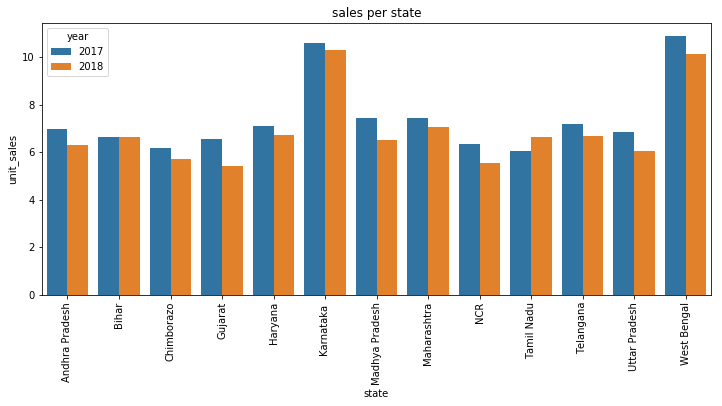

In [40]:
#sales trens across different states in diff years 
data_state_sales=data.groupby(['state','year'])['unit_sales'].mean().reset_index()
#renaming the category to corresponding mapping for better understanding.Refer yo mapping image provided on top
data_state_sales['state'] = data_state_sales.state.cat.rename_categories({1: 'Karnataka ', 
                                                                                     2: 'NCR',
                                                                                     3: 'West Bengal',
                                                                                     4: 'Uttar Pradesh',
                                                                                     5: 'Chimborazo',
                                                                                     6: 'Gujarat',
                                                                                     7: 'Madhya Pradesh',
                                                                                     8: 'Haryana',
                                                                                     9: 'Maharashtra',
                                                                                     10:'Tamil Nadu',
                                                                                     11:'Andhra Pradesh',
                                                                                     12:'Telangana',
                                                                                     13:'Bihar'                                
                                                                                    })
plt.figure(figsize=(12,5))
fig=sns.barplot(x='state',y='unit_sales',hue='year',data=data_state_sales)
plt.title("sales per state")
fig=fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
del data_state_sales

##### Observation: 
    1.except for Bihar state sales dropped in all other states in 2018

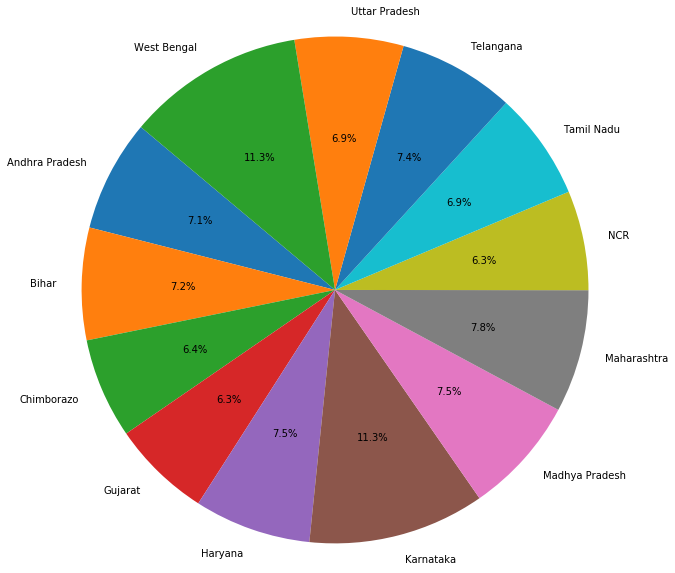

In [8]:
#Average sales across different states 
data_state_sales=data.groupby(['state'])['unit_sales'].mean().reset_index()
#renaming the category to corresponding mapping for better understanding.Refer yo mapping image provided on top
data_state_sales['state'] =  data_state_sales.state.cat.rename_categories({1: 'Karnataka ', 
                                                                                     2: 'NCR',
                                                                                     3: 'West Bengal',
                                                                                     4: 'Uttar Pradesh',
                                                                                     5: 'Chimborazo',
                                                                                     6: 'Gujarat',
                                                                                     7: 'Madhya Pradesh',
                                                                                     8: 'Haryana',
                                                                                     9: 'Maharashtra',
                                                                                     10:'Tamil Nadu',
                                                                                     11:'Andhra Pradesh',
                                                                                     12:'Telangana',
                                                                                     13:'Bihar'                                
                                                                                    })
plt.figure(figsize=(10,10))
labels = data_state_sales['state'].tolist()
sizes = data_state_sales['unit_sales'].tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%',startangle=140)
plt.axis('equal')
plt.show()
del data_state_sales

##### Observation:
    West Bengal and Haryana has the highest sales and each of these states contribute to 11.3% of overall small basket sales.

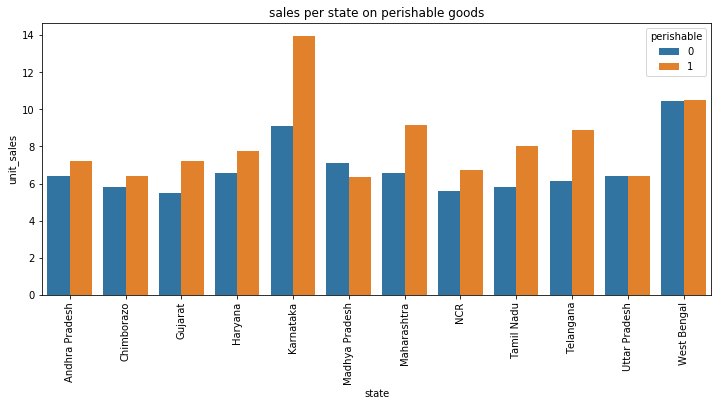

In [20]:
#sales trens across different states on perishable goods 
data_state_perishable=data.groupby(['state','perishable'])['unit_sales'].mean().reset_index()
#renaming the category to corresponding mapping for better understanding.Refer yo mapping image provided on top
#dict_state=open_Pkl('dict_state')
data_state_perishable['state'] = data_state_perishable['state'].map(dict_state)
plt.figure(figsize=(12,5))
fig=sns.barplot(x='state',y='unit_sales',hue='perishable',data=data_state_perishable)
plt.title("sales per state on perishable goods")
fig=fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
del data_state_perishable

#### Obervation:
    Sales of perishable goods is more across most of the states except for Uttar Pradesh and west bengal its the same

##### Observation:
    There are around 21 non perishable items and around 9 non perishable items in small basket

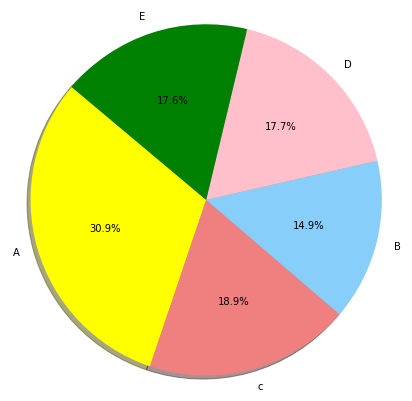

In [66]:
#Average sales per business Type
data_type_sales=data.groupby(['type'])['unit_sales'].mean().reset_index()
#renaming the category to corresponding mapping for better understanding.Refer yo mapping image provided on top
data_type_sales['type'] = data_type_sales.type.cat.rename_categories({1: 'D',
                                                                      2: 'c',
                                                                      3: 'B',
                                                                      4: 'E',
                                                                      5: 'A'})
plt.figure(figsize=(7,7))
labels = data_type_sales['type'].tolist()
sizes = data_type_sales['unit_sales'].tolist()
colors = ['yellow', 'lightcoral', 'lightskyblue', 'pink','green']
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()
del data_type_sales

##### Observation:
    Business Type A has highest sales.

In [6]:
#Loading pickle file
data=open_Pkl('Merge_Data_final_week_WoInf')

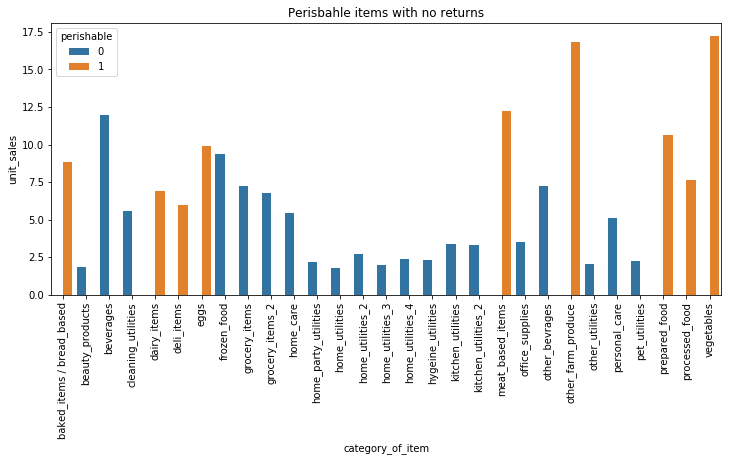

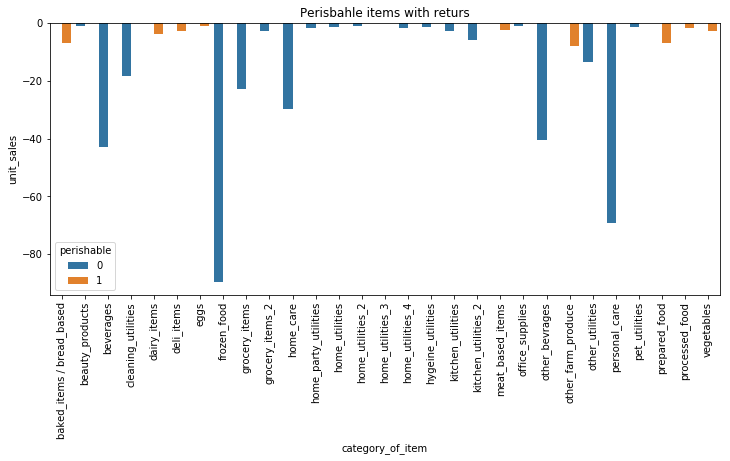

In [7]:
#Check which clusters belong to each business unit
data_unitsales_Pos = data[ (data['unit_sales']>0)]
data_unitsales_neg = data[ (data['unit_sales']<0)]


x_pos=data_unitsales_Pos.groupby(['category_of_item','perishable'])['unit_sales'].mean().reset_index()
x_neg=data_unitsales_neg.groupby(['category_of_item','perishable'])['unit_sales'].mean().reset_index()

dict_cat_items=open_Pkl('dict_cat_items')
x_pos['category_of_item']=x_pos['category_of_item'].map(dict_cat_items)
plt.figure(figsize=(12,5))
fig=sns.barplot(x='category_of_item',y='unit_sales',hue='perishable',data=x_pos)
plt.title("Perisbahle items with no returns")
fig=fig.set_xticklabels(fig.get_xticklabels(), rotation=90)

x_neg['category_of_item']=x_neg['category_of_item'].map(dict_cat_items)
plt.figure(figsize=(12,5))
fig=sns.barplot(x='category_of_item',y='unit_sales',hue='perishable',data=x_neg)
plt.title("Perisbahle items with returs")
fig=fig.set_xticklabels(fig.get_xticklabels(), rotation=90)


#### Observation:

    1.Returns on non perishable items like frozen food,Beverages,personal care are high.
    2.Sales of perishable items is more compared to non perishable ones.May be due to evreyday use of these perishable food items.

In [15]:
#Loading pickle file
#data=open_Pkl('Merge_Data_date')
#data['year']     =data['date'].dt.year
data_unitsales_Pos = data[ (data['unit_sales']>0)]
data_unitsales_neg = data[ (data['unit_sales']<0)]

Text(0.5,1,'Effect of returns on yearly sales')

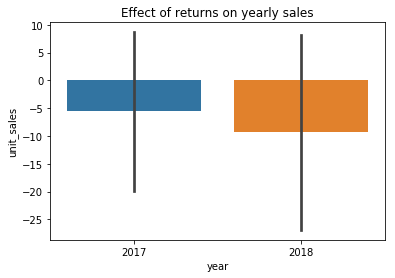

In [28]:
x_pos=data_unitsales_Pos.groupby(['year'])['unit_sales'].mean().reset_index()
x_neg=data_unitsales_neg.groupby(['year'])['unit_sales'].mean().reset_index()

sales_year=x_pos.append(x_neg, ignore_index=True)

sns.barplot(x='year',y='unit_sales',data=sales_year)
plt.title("Effect of returns on yearly sales")



##### Observation:

    1.The sales in 2018 dropped majorly because of the returns.
    2.Returns have increased drastically from 2017 to 2018.The sale otherwise dint fall much from 2017 to 2018 but since the returns have increased the overall sales have come down.
    

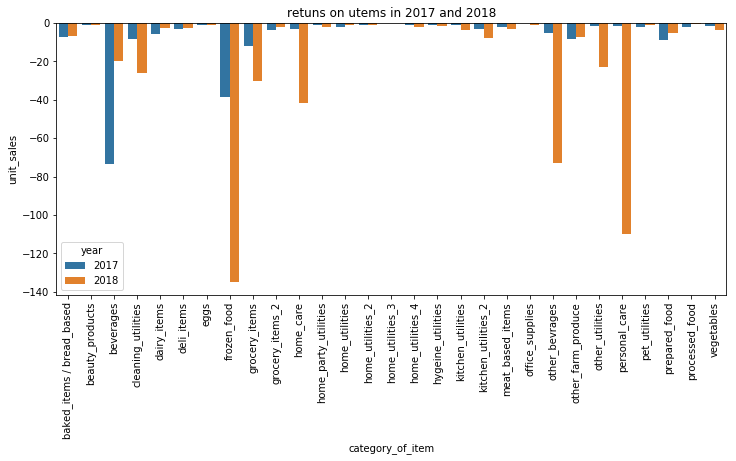

In [38]:
#Check Which items returns have increased from 2017 to 2018
x_neg_items=data_unitsales_neg.groupby(['category_of_item','year'])['unit_sales'].mean().reset_index()
dict_cat_items=open_Pkl('dict_cat_items')
x_neg_items['category_of_item']=x_neg_items['category_of_item'].map(dict_cat_items)
plt.figure(figsize=(12,5))
fig=sns.barplot(x='category_of_item',y='unit_sales',hue='year',data=x_neg_items)
plt.title("retuns on utems in 2017 and 2018")
fig=fig.set_xticklabels(fig.get_xticklabels(), rotation=90)

#### Observation:

    1.The returns of frozen food,personal care and other beverages have increased drastically in 2018.
    2.On an average returns of almost all items have increased in 2018.
    3.Small Basket should analyze why these returns have gone up to improve its business over coming years.
    

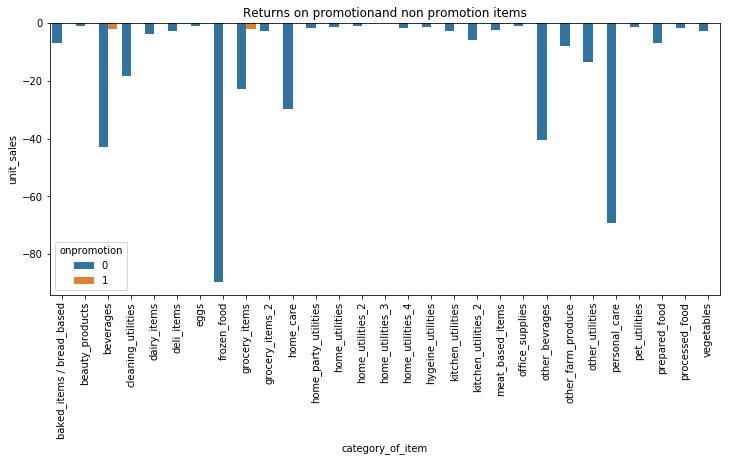

In [10]:
#Check if there are returns on promotion items
data_unitsales_neg = data[ (data['unit_sales']<0)]
prom_returns=data_unitsales_neg.groupby(['category_of_item','onpromotion'])['unit_sales'].mean().reset_index()
dict_cat_items=open_Pkl('dict_cat_items')
prom_returns['category_of_item']=prom_returns['category_of_item'].map(dict_cat_items)
plt.figure(figsize=(12,5))
fig=sns.barplot(x='category_of_item',y='unit_sales',hue='onpromotion',data=prom_returns)
plt.title("Returns on promotionand non promotion items")
fig=fig.set_xticklabels(fig.get_xticklabels(), rotation=90)

##### Observation:
    
    As Expected there are no returns on promotion items.

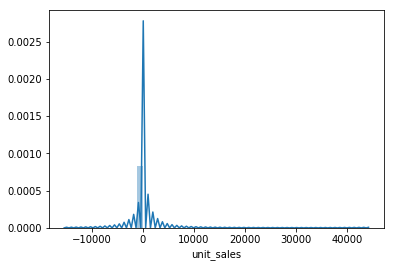

In [9]:
#Distribution of unit sales in the given data
sns.distplot(data['unit_sales'])

##### Observation:
    1.Most of the data on unit sales lies between -1000 to +1000
    2.we can see that there are -ve values for unitsales.The negative values might be due to returns.
    

In [50]:
#Check by what percent returns increased
A=data_unitsales_neg.groupby(['year'])['unit_sales'].count().reset_index()
A['unit_sales'].pct_change()

0        NaN
1    0.37554
Name: unit_sales, dtype: float64

#### Observation:
    
    There is 37% increase in returns in 2018.

In [31]:
#Getting pickled transactions data file
trans=open_Pkl('transactions_update')

In [32]:
#Extracting features from date for transactions table
trans['date']=pd.to_datetime(trans['date'])#Convert to datetime
trans['year']=trans['date'].dt.year

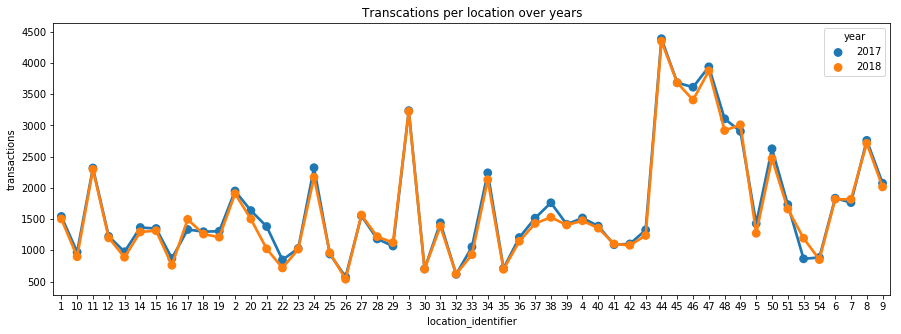

In [8]:
#Average transactions per location across years
#Check if the transactions are more on promotion items.
trans_loc_year=trans.groupby(['year','location_identifier'])['transactions'].mean().reset_index()
plt.figure(figsize=(15,5))
sns.pointplot(x='location_identifier',y='transactions',hue='year',data=trans_loc_year)
plt.title("Transcations per location over years")
del trans_loc_year

#### Observation:
    The average transactions did not change much per location across years.
    

In [36]:
transaction_time.head()

,date,transactions
0,2017-01-01,2202.000000
1,2017-01-02,2016.854167
2,2017-01-03,2006.000000
3,2017-01-04,1968.666667
4,2017-01-05,1851.666667


(array([736299., 736389., 736481., 736573., 736664., 736754., 736846.,
        736938., 737029.]), <a list of 9 Text xticklabel objects>)

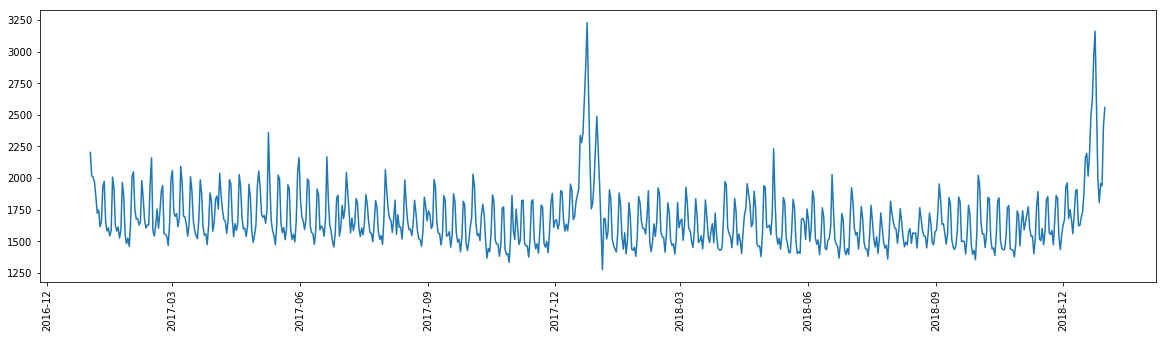

In [41]:
#average transactions over date
transaction_time=trans.groupby(['date'])['transactions'].mean().reset_index()
transaction_time['date']=pd.to_datetime(transaction_time['date'])

plt.figure(figsize=(20,5))
plt.plot(transaction_time['date'], transaction_time['transactions'])
plt.xticks(rotation='vertical')
del transaction_time

##### Observations:
    The transactions are high during the year ends.

In [26]:
#Getting pickled transactions data file
data_date=open_Pkl('Merge_Data_date')

(array([736299., 736389., 736481., 736573., 736664., 736754., 736846.,
        736938., 737029.]), <a list of 9 Text xticklabel objects>)

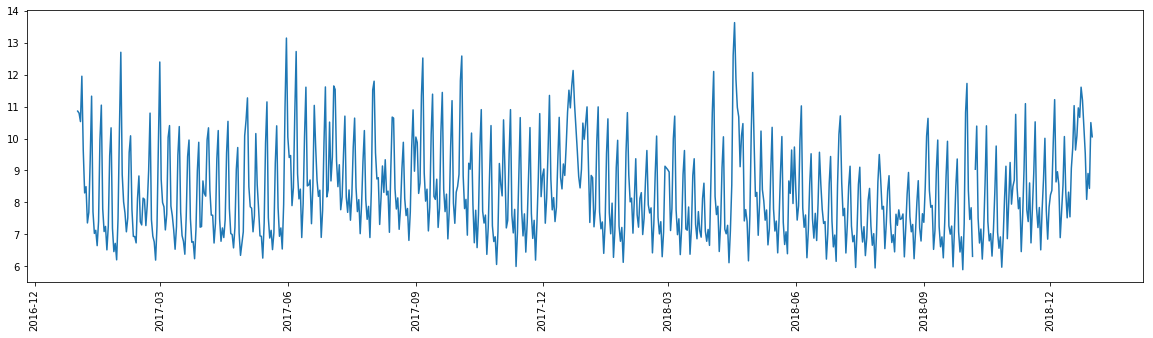

In [49]:
#Average Sales over date
sales_time=data_date.groupby(['date'])['unit_sales'].mean().reset_index()
sales_time['date']=pd.to_datetime(sales_time['date'])
plt.figure(figsize=(20,5))
plt.plot(sales_time['date'], sales_time['unit_sales'])
plt.xticks(rotation='vertical')


#### Observations:
    Observed from transactions series that the number of transactions are more during year end.But from sales series we can observe that there is no correlation between transactions and unit sales.
    

Text(0.5,0,'Date')

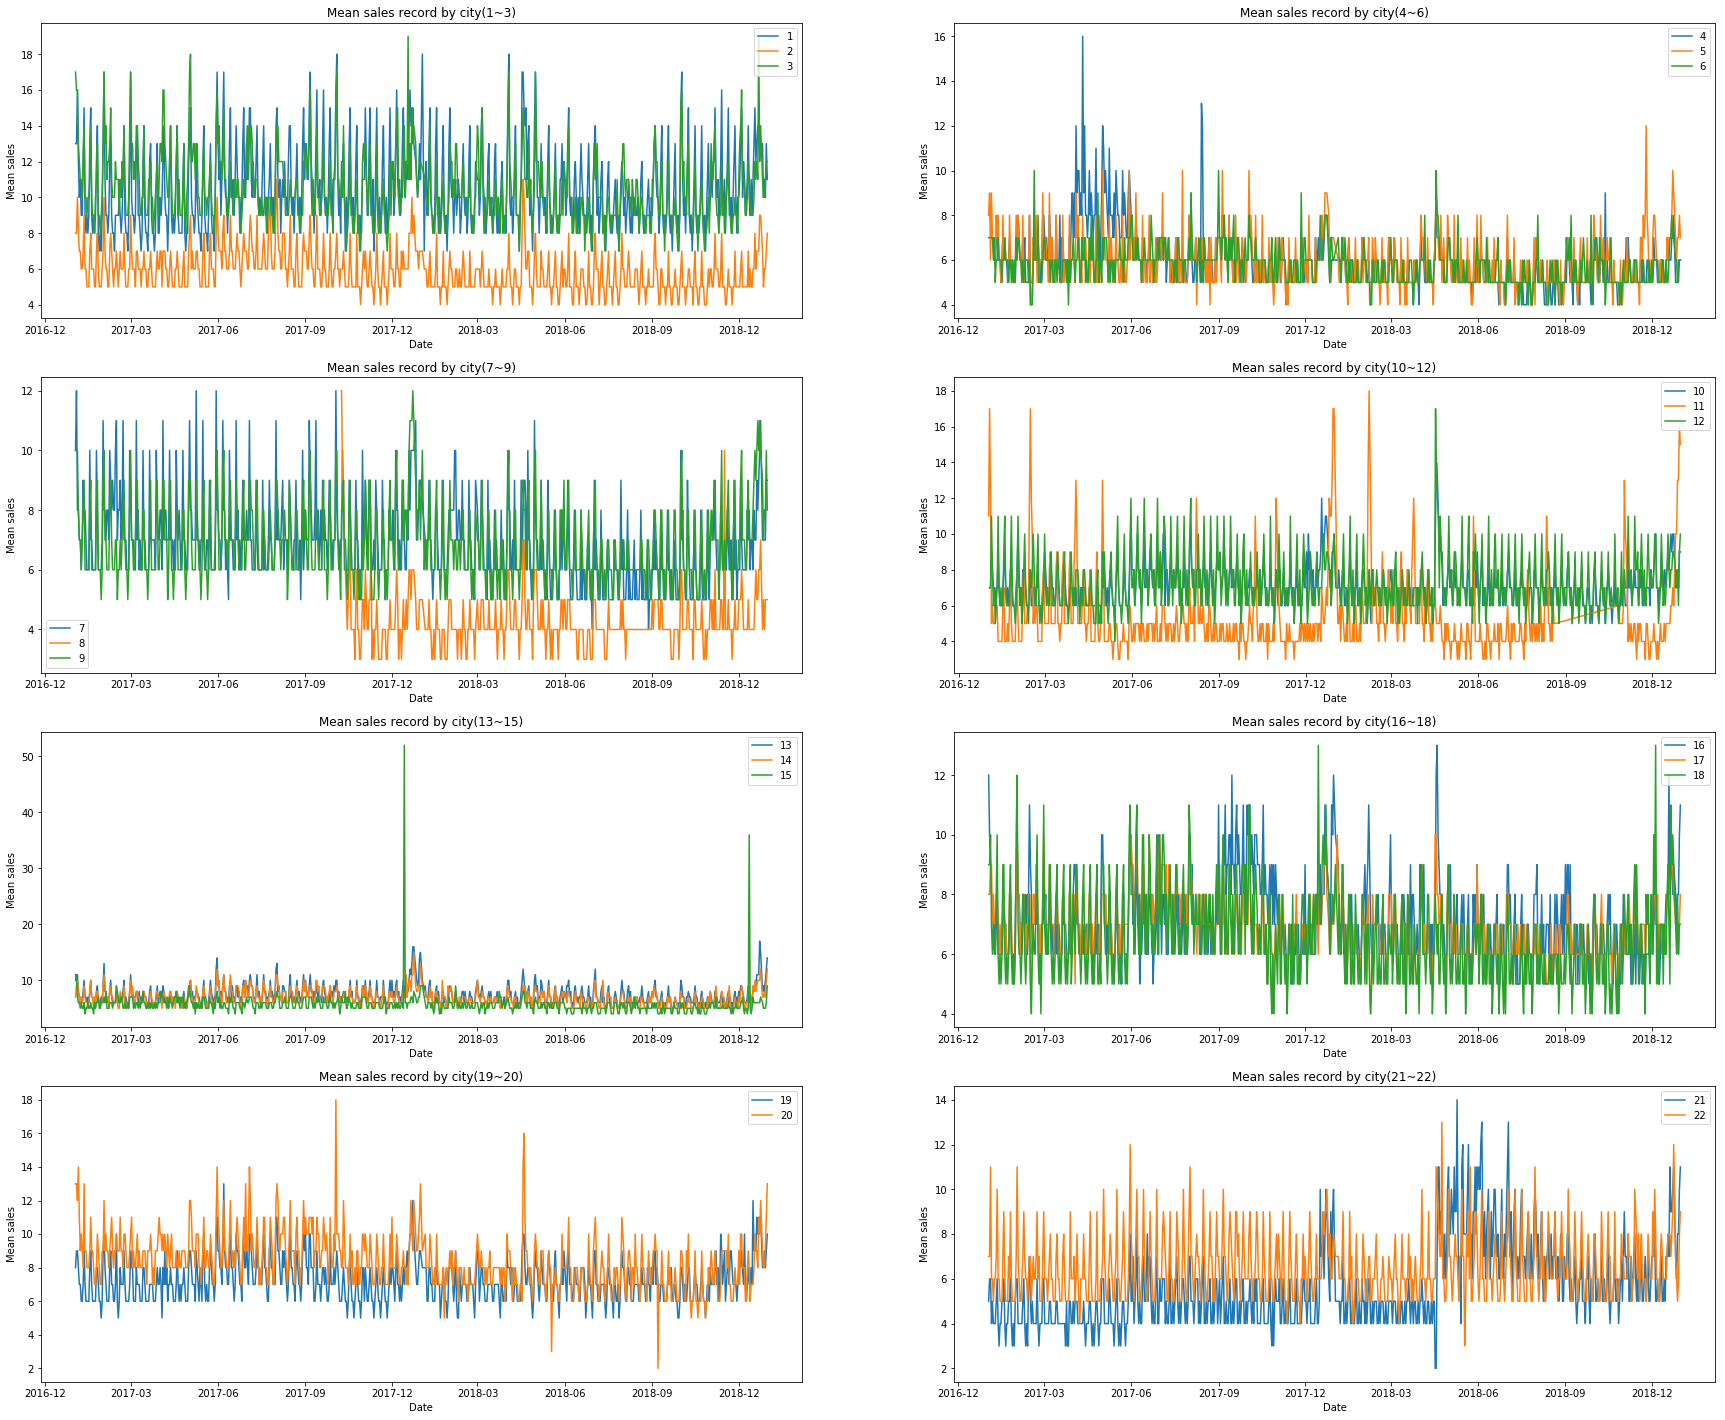

In [40]:
#Sales Across cities
Data_City=data_date[['city','date','unit_sales']]
Data_City=Data_City.groupby(['city','date']).mean().round(0).reset_index()


city=Data_City['city'].unique()
city.sort()
city_1=city[0:3]
city_2=city[3:6]
city_3=city[6:9]
city_4=city[9:12]
city_5=city[12:15]
city_6=city[15:18]
city_7=city[18:20]
city_8=city[20:22]

fig, ax = plt.subplots(4,2,figsize=(30,25))


for i in city_1 :
    data_1=Data_City[Data_City['city']==i]
    ax[0,0].plot(data_1['date'], data_1['unit_sales'])
    ax[0,0].legend([1,2,3]) 
        
for i in city_2 :
    data_2=Data_City[Data_City['city']==i]
    ax[0,1].plot(data_2['date'], data_2['unit_sales'])
    ax[0,1].legend([4,5,6])

for i in city_3 :
    data_3=Data_City[Data_City['city']==i]
    ax[1,0].plot(data_3['date'], data_3['unit_sales'])
    ax[1,0].legend([7,8,9])
    
for i in city_4 :
    data_4=Data_City[Data_City['city']==i]
    ax[1,1].plot(data_4['date'], data_4['unit_sales'])
    ax[1,1].legend([10,11,12])
    
for i in city_5 :
    data_5=Data_City[Data_City['city']==i]
    ax[2,0].plot(data_5['date'], data_5['unit_sales'])
    ax[2,0].legend([13,14,15])
    
for i in city_6 :
    data_6=Data_City[Data_City['city']==i]
    ax[2,1].plot(data_6['date'], data_6['unit_sales'])
    ax[2,1].legend([16,17,18])
    
for i in city_7 :
    data_7=Data_City[Data_City['city']==i]
    ax[3,0].plot(data_7['date'], data_7['unit_sales']) 
    ax[3,0].legend([19,20])

for i in city_8 :
    data_8=Data_City[Data_City['city']==i]
    ax[3,1].plot(data_8['date'], data_8['unit_sales']) 
    ax[3,1].legend([21,22])
    
    
  
ax[0,0].set_title('Mean sales record by city(1~3)')
ax[0,1].set_title('Mean sales record by city(4~6)')
ax[1,0].set_title('Mean sales record by city(7~9)')
ax[1,1].set_title('Mean sales record by city(10~12)')
ax[2,0].set_title('Mean sales record by city(13~15)')
ax[2,1].set_title('Mean sales record by city(16~18)')
ax[3,0].set_title('Mean sales record by city(19~20)')
ax[3,1].set_title('Mean sales record by city(21~22)')

ax[0,0].set_ylabel('Mean sales')
ax[0,0].set_xlabel('Date')
ax[0,1].set_ylabel('Mean sales')
ax[0,1].set_xlabel('Date')
ax[1,0].set_ylabel('Mean sales')
ax[1,0].set_xlabel('Date')
ax[1,1].set_ylabel('Mean sales')
ax[1,1].set_xlabel('Date')
ax[2,0].set_ylabel('Mean sales')
ax[2,0].set_xlabel('Date')
ax[2,1].set_ylabel('Mean sales')
ax[2,1].set_xlabel('Date')
ax[3,0].set_ylabel('Mean sales')
ax[3,0].set_xlabel('Date')
ax[3,1].set_ylabel('Mean sales')
ax[3,1].set_xlabel('Date')


City         Mapping
Bengaluru   	1
Delhi       	2
Kolkata     	3
Noida       	4
Vijayawada  	5
Ahmedabad   	6
Indore      	7
Gandhinagar 	8
Gurgaon     	9
Mumbai      	10
Kanpur      	11
Mysore      	12
Nagpur      	13
Coimbatore  	14
Visakhapatnam 	15
Guntur      	16
Hyderabad   	17
Surat       	18
Pune        	19
Lucknow     	20
Chennai     	21
Patna       	22


Observation:

    1.Vishakapatnam has very high sare during december,very moderate sales during rest of the months.
    2.Noida has high sales during April.
    3.The highest sale day will differ from location to location.E.g Some cities are not sensitive to christmas.

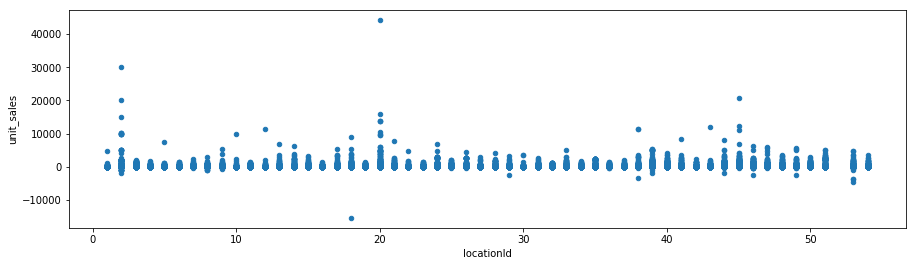

In [12]:
#Distribution of sales across locations
data_date['locationId']=data_date['locationId'].astype('int8')
data_date.plot(kind='scatter',x='locationId',y='unit_sales',figsize=(15,4))

#### Observation:
    
    1.Location 2,20,47 have highest sales.

In [28]:
#Loading from pickle copy
data=open_Pkl('train_update')
#Converting date to datetime
data['date']=pd.to_datetime(data['date'])

In [18]:
#Getting pickled transactions data file
locations=open_Pkl('location_wo_Conv')

#### Ckeck if there is any statistically significant relation between business type and  cluster?

Null Hypothesis H0 = business Type (a, b, c, d, e) and Cluster (1 to 17) are independent from each other.
Alternative Hypothesis HA = business Type and cluster are not independent of each other. There is a relationship between them.

business Type - categorical variable
Cluster - categorical variable

Now, to determine if there is a statistically significant correlation between the variables, we use a chi-square test of independence of variables in a contingency table

Here, we create a contingency table, with the frequencies of all possible values

In [19]:
#Contingency table for type and cluster
ct_type_cluster = pd.crosstab(locations['type'], locations['cluster'])
ct_type_cluster

cluster,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
type,,,,,,,,,,,,,,,,,
A,0,0,0,0,1,0,0,0,0,0,3,0,0,4,0,0,1
B,0,0,0,0,0,6,0,0,0,1,0,0,0,0,0,1,0
C,0,0,7,0,0,0,2,0,0,0,0,1,0,0,5,0,0
D,3,2,0,3,0,0,0,3,2,1,0,0,4,0,0,0,0
E,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0


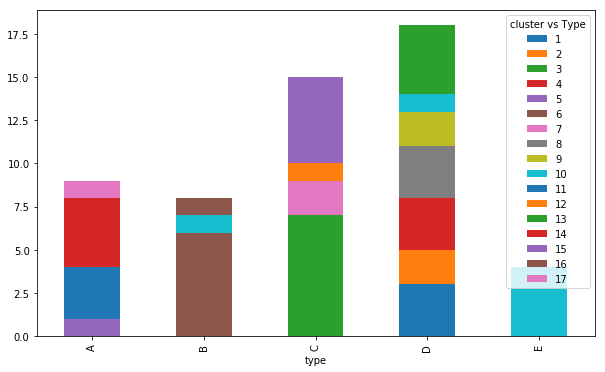

In [21]:
ct_type_cluster.plot.bar(figsize = (10, 6), stacked=True)
plt.legend(title='cluster vs Type')
plt.show()

In [25]:
st.chi2_contingency(ct_type_cluster)

(189.87500000000003,
 2.105033183851119e-14,
 64,
 array([[0.5       , 0.33333333, 1.16666667, 0.5       , 0.16666667,
         1.        , 0.33333333, 0.5       , 0.33333333, 1.        ,
         0.5       , 0.16666667, 0.66666667, 0.66666667, 0.83333333,
         0.16666667, 0.16666667],
        [0.44444444, 0.2962963 , 1.03703704, 0.44444444, 0.14814815,
         0.88888889, 0.2962963 , 0.44444444, 0.2962963 , 0.88888889,
         0.44444444, 0.14814815, 0.59259259, 0.59259259, 0.74074074,
         0.14814815, 0.14814815],
        [0.83333333, 0.55555556, 1.94444444, 0.83333333, 0.27777778,
         1.66666667, 0.55555556, 0.83333333, 0.55555556, 1.66666667,
         0.83333333, 0.27777778, 1.11111111, 1.11111111, 1.38888889,
         0.27777778, 0.27777778],
        [1.        , 0.66666667, 2.33333333, 1.        , 0.33333333,
         2.        , 0.66666667, 1.        , 0.66666667, 2.        ,
         1.        , 0.33333333, 1.33333333, 1.33333333, 1.66666667,
         0.33333333,

Result:
        
        The p-value is much lower than 0.05.
        There is strong evidence that the null hypothesis is False.
        We reject the null hypothesis and conclude that there is a statistically significant correlation between the Store Type and cluster.

#### Ckeck if there is any statistically significant relation between city and  cluster?


Null Hypothesis H0 = City and Cluster are independent from each other.
Alternative Hypothesis HA = City Tpe and cluster are not independent of each other. There is a relationship between them.

City - categorical variable
Cluster - categorical variable

Now, to determine if there is a statistically significant correlation between the variables, we use a chi-square test of independence of variables in a contingency table

Here, we create a contingency table, with the frequencies of all possible values

In [30]:
# Contingency table or city and cluster
ct_cluster_city = pd.crosstab(locations['city'], locations['cluster'])
ct_cluster_city

cluster,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
city,,,,,,,,,,,,,,,,,
Ahmedabad,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Bengaluru,0,0,0,0,1,2,0,3,1,0,2,1,3,3,1,1,0
Chennai,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
Coimbatore,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Delhi,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
Gandhinagar,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
Guntur,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Gurgaon,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
Hyderabad,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


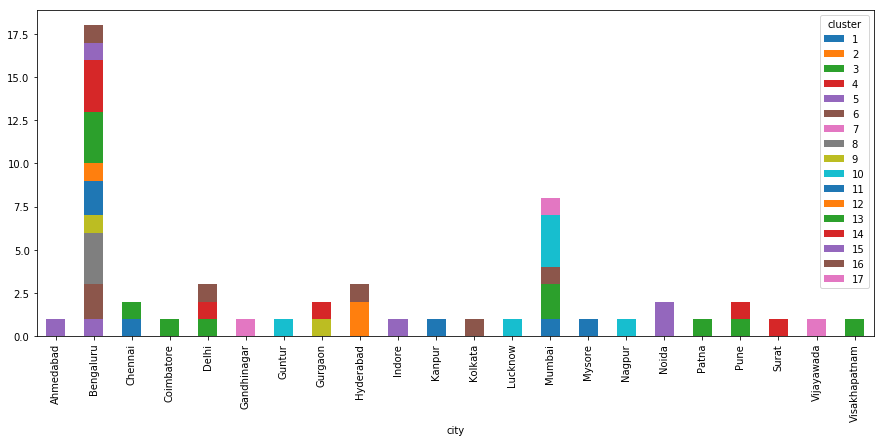

In [31]:
ct_cluster_city.plot.bar(figsize = (15, 6), stacked=True)
plt.legend(title='cluster')
plt.show()

In [32]:
st.chi2_contingency(ct_cluster_city)

(319.4785714285715,
 0.7331133418489268,
 336,
 array([[0.05555556, 0.03703704, 0.12962963, 0.05555556, 0.01851852,
         0.11111111, 0.03703704, 0.05555556, 0.03703704, 0.11111111,
         0.05555556, 0.01851852, 0.07407407, 0.07407407, 0.09259259,
         0.01851852, 0.01851852],
        [1.        , 0.66666667, 2.33333333, 1.        , 0.33333333,
         2.        , 0.66666667, 1.        , 0.66666667, 2.        ,
         1.        , 0.33333333, 1.33333333, 1.33333333, 1.66666667,
         0.33333333, 0.33333333],
        [0.11111111, 0.07407407, 0.25925926, 0.11111111, 0.03703704,
         0.22222222, 0.07407407, 0.11111111, 0.07407407, 0.22222222,
         0.11111111, 0.03703704, 0.14814815, 0.14814815, 0.18518519,
         0.03703704, 0.03703704],
        [0.05555556, 0.03703704, 0.12962963, 0.05555556, 0.01851852,
         0.11111111, 0.03703704, 0.05555556, 0.03703704, 0.11111111,
         0.05555556, 0.01851852, 0.07407407, 0.07407407, 0.09259259,
         0.01851852, 0.

Result:
    
    The p-value is higher than 0.05.
    There is NO evidence to reject Null Hypothesis.
    We can continue with the null hypothesis and conclude that there is no dependence of cluster and cities

In [18]:
#Getting pickled transactions data file
items=open_Pkl('item_wo_Conv')

Ckeck if there is any statistically significant relation between category of items item and class?

Null Hypothesis H0 = category of items item and class are independent from each other.
Alternative Hypothesis HA = category of items item and class are not independent of each other. There is a relationship between them. 

category of items - categorical variable 
class - categorical variable Now, to determine if there is a statistically significant correlation between the variables, we 

use a chi-square test of independence of variables in a contingency table

Here, we create a contingency table, with the frequencies of all possible values

In [12]:
## Contingency table for item class and category_of_item
ct_items_class= pd.crosstab(items['class'],items['category_of_item'])

In [13]:
st.chi2_contingency(ct_items_class)

(118900.0,
 0.0,
 9744,
 array([[1.01317073e+00, 1.43658537e-01, 4.63487805e+00, ...,
         6.04878049e-02, 7.56097561e-03, 4.08292683e-01],
        [1.30731707e-01, 1.85365854e-02, 5.98048780e-01, ...,
         7.80487805e-03, 9.75609756e-04, 5.26829268e-02],
        [1.27463415e+00, 1.80731707e-01, 5.83097561e+00, ...,
         7.60975610e-02, 9.51219512e-03, 5.13658537e-01],
        ...,
        [1.30731707e-01, 1.85365854e-02, 5.98048780e-01, ...,
         7.80487805e-03, 9.75609756e-04, 5.26829268e-02],
        [3.26829268e-01, 4.63414634e-02, 1.49512195e+00, ...,
         1.95121951e-02, 2.43902439e-03, 1.31707317e-01],
        [6.86341463e-01, 9.73170732e-02, 3.13975610e+00, ...,
         4.09756098e-02, 5.12195122e-03, 2.76585366e-01]]))

Result:

    The p-value is much lower than 0.05.
    There is strong evidence that the null hypothesis is False.
    We reject the null hypothesis and conclude that there is a statistically significant correlation between the class and           category of item

In [12]:
#loading final merged data into picle file
#load_Pkl('Merge_Data_final_week_WoInf',data_date)

Ckeck if there is any statistically significant relation between category of items item and perishable?

Null Hypothesis H0 = category of items item and perishable are independent from each other.
Alternative Hypothesis HA = category of items item and perishable are not independent of each other. There is a relationship between them. 

category of items - categorical variable 
perishable - categorical variable Now, to determine if there is a statistically significant correlation between the variables, we 

use a chi-square test of independence of variables in a contingency table

Here, we create a contingency table, with the frequencies of all possible values

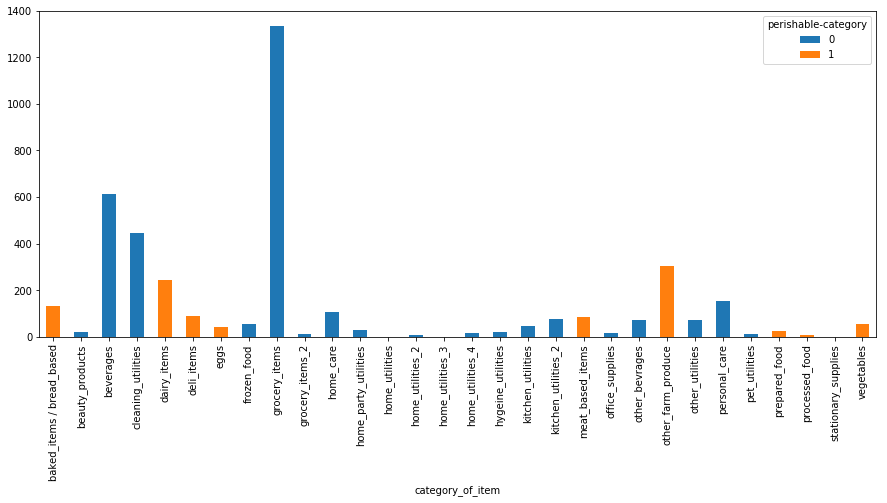

In [20]:
## Contingency table for item perishable and category_of_item
ct_items_per= pd.crosstab(items['category_of_item'],items['perishable'])
ct_items_per.plot.bar(figsize = (15, 6), stacked=True)
plt.legend(title='perishable-category')
plt.show()

In [21]:
st.chi2_contingency(ct_items_per)

(4100.0, 0.0, 29, array([[1.01774634e+02, 3.22253659e+01],
        [1.44307317e+01, 4.56926829e+00],
        [4.65580976e+02, 1.47419024e+02],
        [3.38742439e+02, 1.07257561e+02],
        [1.83801951e+02, 5.81980488e+01],
        [6.91156098e+01, 2.18843902e+01],
        [3.11400000e+01, 9.86000000e+00],
        [4.17731707e+01, 1.32268293e+01],
        [1.01318927e+03, 3.20810732e+02],
        [1.06331707e+01, 3.36682927e+00],
        [8.20273171e+01, 2.59726829e+01],
        [2.35448780e+01, 7.45512195e+00],
        [7.59512195e-01, 2.40487805e-01],
        [4.55707317e+00, 1.44292683e+00],
        [7.59512195e-01, 2.40487805e-01],
        [1.29117073e+01, 4.08829268e+00],
        [1.59497561e+01, 5.05024390e+00],
        [3.41780488e+01, 1.08219512e+01],
        [5.84824390e+01, 1.85175610e+01],
        [6.37990244e+01, 2.02009756e+01],
        [1.13926829e+01, 3.60731707e+00],
        [5.54443902e+01, 1.75556098e+01],
        [2.32410732e+02, 7.35892683e+01],
        [5.316585

Result:

    The p-value is much lower than 0.05.
    There is strong evidence that the null hypothesis is False.
    We reject the null hypothesis and conclude that there is a statistically significant correlation between the perishabile and category of item

Conclusion:

    1.Category of items is correlated with class and if the item is perishable or not
    2.Bussiness type and cluster are correlated.-->cluster represents business type
    3.Cluster and city are not correlated --> cluster doesnt represnt cities


### Model Building

In [1]:
### Load the required libraries
%matplotlib inline
import os
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from IPython.display import SVG
from IPython.display import display
from graphviz import Source
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,RobustScaler
import matplotlib.pyplot as plt
from mlxtend.plotting import category_scatter
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV,learning_curve,validation_curve
from sklearn.linear_model import LinearRegression 
from mlxtend.plotting import plot_learning_curves
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import export_graphviz,DecisionTreeRegressor
from sklearn.model_selection import validation_curve
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Input,Dense
from keras import regularizers, optimizers
from keras.models import Model
from keras import losses
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import operator
from functools import reduce
import pickle as pkl
import shutil

C:\Users\Prithvi\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# To filter/truncate warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Setting path for pickle file
#PATH='/content/drive/My Drive/PHD_Insofe/Backup_Pkl'
PATH='E:\\PGPDataScience\\PHD\\Backups_pkl'
#if os.path.exists(PATH):
#  shutil.rmtree(PATH)
#os.mkdir(PATH)
print(os.getcwd())
os.chdir(PATH)
print(os.getcwd())

E:\PGPDataScience\PHD\EDA
E:\PGPDataScience\PHD\Backups_pkl


In [4]:
#Functions
#Function to load pickle file
def load_Pkl(filename,file):
  outfile=open(filename,'wb')
  pkl.dump(file,outfile)
  outfile.close()
  del outfile

#Function to open Pickel File
def open_Pkl(filename):
  infile=open(filename,'rb')
  loaded_pkl=pkl.load(infile)
  infile.close() 
  return(loaded_pkl)
  del infile,loaded_pkl
    
#Function to get datatypes,no. of NA's and no. of unique values
def Data_Analysis(data):
    print("Dimensions of the data")
    print(data.shape)
    Dtype    = data.dtypes
    NoOfNA   = data.isna().sum()
    Uniquevalues = data.astype('object').describe(include='all').loc['unique', :]
    Output = pd.DataFrame({"DataType":Dtype,"No Of NA's":NoOfNA,"No Of Unique Values":Uniquevalues})
    return(Output)
    del Dtype,NoOfNA,Uniquevalues,Output  
    
#Function to split data
def split_data(X,y):
  pct=int(0.7 * len(X))
  X_train = X[:pct]
  X_valid = X[pct:]
  y_train = y[:pct]    
  y_valid = y[pct:]
  return(X_train, X_valid, y_train, y_valid)  

#Function to find items present in one list and not present in another
def setdiff_sorted(array1,array2,assume_unique=False):
    ans = np.setdiff1d(array1,array2,assume_unique).tolist()
    if assume_unique:
        return sorted(ans)
    return ans

### PreProcessing Data for model building:
From EDA its evident that train dataset provide alone is sufficient to make predictions.But to analyze further on the kind of items and locations we might need other datasets. Once the test predictions are done we can merge other datasets with test and get more insights of the sales from Jan 1st 2019 to Jan 15th 2019

In [0]:
#Loading from pickle copy
data=open_Pkl('train_update')

In [0]:
#handling Inf values in the data
data= data.replace([np.inf, -np.inf], np.nan)
#Drop na's
data=data.dropna()

In [0]:
print("Train data specifics \n",Data_Analysis(data))

Dimensions of the data
(63094515, 5)
Train data specifics 
              DataType  No Of NA's No Of Unique Values
date         category           0                 728
locationId   category           0                  53
item_id      category           0                3887
unit_sales    float16           0               12328
onpromotion  category           0                   2


In [0]:
#Converting date to datetime
data['date']=pd.to_datetime(data['date'])
#Extracting features from date
data['month']    =data['date'].dt.month #To capture monthly sales trend
data['dayofweek']=data['date'].dt.dayofweek #Since weekday and weekend sales trend
data['year']     =data['date'].dt.year#to capture yearly sales trend
data['week']     =data['date'].dt.week#to capture sesonality arocss weeks over year eg-Christmas week
data['day']      =data['date'].dt.day #to capture daily sales trend

#converting int64 to int8 to reduce memory
L=['month','dayofweek','week','day'] #dayofweek Mon-Sun ->0-6
for i in L:
    data[i]=data[i].astype('int8')
del L,i 
#convert year to int16
data['year']=data['year'].astype('int16')

In [0]:
data.head()

,date,locationId,item_id,unit_sales,onpromotion,month,dayofweek,year,week,day
38594264,2017-01-01,25,103665,12.0,0,1,6,2017,52,1
38594265,2017-01-01,25,105575,23.0,0,1,6,2017,52,1
38594266,2017-01-01,25,108634,1.0,0,1,6,2017,52,1
38594267,2017-01-01,25,108698,6.0,0,1,6,2017,52,1
38594268,2017-01-01,25,108786,6.0,0,1,6,2017,52,1


In [0]:
#Since we have only two years dataconverting year to categorical.
data['year'] = data['year'].astype('category')
data['year'] = data['year'].cat.add_categories("2019")#test data we have predict for 2019 since its not 
                                                      #present in train we are adding a new level.
#drop data column after extracting all required information from date
data=data.drop(['date'], axis = 1)
data.dtypes

locationId     category
item_id        category
unit_sales      float16
onpromotion    category
month              int8
dayofweek          int8
year           category
week               int8
day                int8
dtype: object

In [0]:
#rearranging the data so that the target is at the end.
cols=data.columns.tolist()
cols=['locationId','item_id','onpromotion','month','dayofweek','year','week','day','unit_sales']
data=data[cols]
del cols
data.head()

,locationId,item_id,onpromotion,month,dayofweek,year,week,day,unit_sales
38594264,25,103665,0,1,6,2017,52,1,12.0
38594265,25,105575,0,1,6,2017,52,1,23.0
38594266,25,108634,0,1,6,2017,52,1,1.0
38594267,25,108698,0,1,6,2017,52,1,6.0
38594268,25,108786,0,1,6,2017,52,1,6.0


##### Encoding Item_ID and Location_ID

In [0]:
#loading test data from pickle file
test=open_Pkl('test_date')

#Observed that test data has noe item ids.Creating a list with Item ID's of both train and test for label encoding
data_items_cats=data['item_id'].cat.categories.tolist() #all item ID's from train to list
test_items_cats=test['item_id'].cat.categories.tolist() #all item ID's from test to list

items_notin_train=setdiff_sorted(test_items_cats,data_items_cats) #Checking for new item ID's in test
print("New Items IDS in test data",items_notin_train)

item_labels_list=data_items_cats+items_notin_train #creating a list o all item ID's from train and test for encoding


In [0]:
print("length of train data items\n",len(data_items_cats))
print("length of test data items\n",len(test_items_cats))
print("length of items present in test and not in train\n",len(items_notin_train))
print("length of train data items\n",len(item_labels_list))
print("New Item ID's in test data \n",items_notin_train)

length of train data items
 3887
length of test data items
 3828
length of items present in test and not in train
 4
length of train data items
 3891
New Item ID's in test data 
 ['2027559', '2043795', '2043849', '2045545']


In [0]:
#lets check if the new itemIDs in test are  present in item details
df_item=pd.read_csv(r"E:\PGPDataScience\PHD\item_details.csv")
df_item[df_item['item_id'].isin(['2027559', '2043795', '2043849', '2045545'])]

,item_id,category_of_item,class,perishable


Observation:

    Since these item ID's are not present in item details as well,we will have to add them manually.These might be new item added by small basket and haven't yeat been added to item details.But in real time we shoudl be provided with the list of all the expected item ID's else the algorithms will fail while predicting new items on test data.

In [0]:
#Encoding item_id's
enc_values=list(range(len(item_labels_list))) #creating encodings or item ID's
dic_items=dict(zip(item_labels_list,enc_values)) #creating a dic with item ID's and their encodings

data['item_id']=data['item_id'].map(dic_items) #Encoding train data item ID's
data['item_id']=data['item_id'].astype('int32')#converting to int

In [0]:
#Encoding Location_id's
loc_id    = data['locationId'].unique().tolist() #Creating a list of location ID's                   
enc_values=list(range(len(loc_id)))    # encodings for location ID
dic_loc=dict(zip(loc_id,enc_values))   #Dic for location ID with encodings

data['locationId']=data['locationId'].map(dic_loc) #Ecoding train location ID
data['locationId']=data['locationId'].astype('int32')#converting to int 

In [0]:
#Loading encoding dictionar pickle files for further use on test data.
load_Pkl('dic_loc_model_test',dic_loc)
load_Pkl('dic_items_model_test',dic_items)

In [0]:
#Dummfying Year and on promotion
cols_Dummies=['year','onpromotion'] # Columns to dummify
#Creating dummies for train Data
data=pd.get_dummies(columns=cols_Dummies,data=data,drop_first=True)

In [0]:
data.head()

,locationId,item_id,month,dayofweek,week,day,unit_sales,year_2018,year_2019,onpromotion_1
38594264,0,45,1,6,52,1,12.0,0,0,0
38594265,0,121,1,6,52,1,23.0,0,0,0
38594266,0,194,1,6,52,1,1.0,0,0,0
38594267,0,196,1,6,52,1,6.0,0,0,0
38594268,0,201,1,6,52,1,6.0,0,0,0


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63094514 entries, 38594264 to 101688778
Data columns (total 10 columns):
locationId       int32
item_id          int32
month            int8
dayofweek        int8
week             int8
day              int8
unit_sales       float16
year_2018        uint8
year_2019        uint8
onpromotion_1    uint8
dtypes: float16(1), int32(2), int8(4), uint8(3)
memory usage: 1.5 GB


In [5]:
#loading final merged data into picle file
#load_Pkl('data_model_Reg',data)
data=open_Pkl('data_model_Reg')

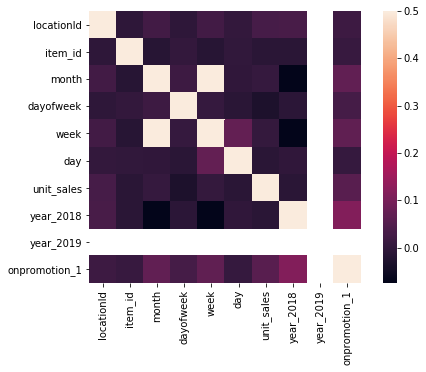

In [9]:
#Heat Map to check the coreelation between the variables
corrmat = data.corr()
plt.subplots(figsize=(8,5))
sns.heatmap(corrmat, vmax=0.5, square=True)

In [0]:
#Checking the min and max value of the target variable
print(data['unit_sales'].max())
print(data['unit_sales'].min())

44130.0
-15380.0


##### Split Data

In [18]:
#Train Validation split on data
X, y = data.loc[:,data.columns!='unit_sales'], data.loc[:,'unit_sales']
X_train, X_valid, y_train, y_valid = split_data(X, y)

In [8]:
X_train.head()

,locationId,item_id,month,dayofweek,week,day,year_2018,year_2019,onpromotion_1
38594264,0,45,1,6,52,1,0,0,0
38594265,0,121,1,6,52,1,0,0,0
38594266,0,194,1,6,52,1,0,0,0
38594267,0,196,1,6,52,1,0,0,0
38594268,0,201,1,6,52,1,0,0,0


#### Machine Learning algorithms on preprocessed data set to forecast the sales for smallbasket across several items and locations


In [5]:
# Functions related  to model

#Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#Function to calculate RMSE
def root_mean_square_error(y_true, y_pred):
    return np.sqrt(((y_pred - y_true) ** 2).mean())

#Function to print error metrics
def RegressionErrorMetric(y_true, y_pred):
    MSE=mean_squared_error(y_true, y_pred)
    RMSE=root_mean_square_error(y_true, y_pred)
    MAE=mean_absolute_error(y_true, y_pred)
    MAPE=mean_absolute_percentage_error(y_true, y_pred)
       
    print('               MSE: ', round(MSE,4))
    print('              RMSE: ', round(RMSE,4))
    print('               MAE: ', round(MAE,4))
    print('              MAPE: ', round(MAPE,4))
    return(MAPE)

#FUnction to fit model and predict
def model_fit_predict_print(model):
    m=model.fit(X_train, y_train)
    pred_train = m.predict(X_train)
    pred_valid = m.predict(X_valid)
    print(model)
    print("-------Train Error--------")
    MAPE_T=RegressionErrorMetric(y_train,pred_train)
    print("-------Validation Error-----")
    MAPE_V=RegressionErrorMetric(y_valid,pred_valid) 
    return(m,MAPE_T,MAPE_V)

# Function to plot validation curve
def plt_validationCurve(estimator,param_name,param_range):

    # Calculate accuracy on training and test set using range of parameter values
    train_scores, test_scores = validation_curve(estimator, 
                                                 X_train, 
                                                 y_train, 
                                                 param_name=param_name, 
                                                 param_range=param_range,
                                                 cv=5, 
                                                 scoring=("neg_mean_absolute_error")
                                                 )


    # Calculate mean and standard deviation for training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Calculate mean and standard deviation for test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot mean accuracy scores for training and test sets
    plt.plot(param_range, train_mean, label="Training score", color="green")
    plt.plot(param_range, test_mean, label="Cross-validation score", color="red")

    # Plot accurancy bands for training and test sets
    plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
    plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

    # Create plot
    plt.title("Validation Curve ")
    plt.xlabel(param_name)
    plt.ylabel("MAE Score")
    plt.tight_layout()
    plt.legend(loc="best")
    plt.show()
    
#Function to plot residual errors
def Residual_errors(pred_train,pred_valid):
    ## setting plot style 
    plt.style.use('fivethirtyeight')   
    ## plotting residual errors in training data 
    plt.scatter(pred_train, pred_train - y_train, 
                color = "green", s = 10, label = 'Train data')   
    ## plotting residual errors in test data 
    plt.scatter(pred_valid, pred_valid - y_valid, 
                color = "blue", s = 10, label = 'valid data')  
    ## plotting line for zero residual error 
    plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)  
    ## plotting legend 
    plt.legend(loc = 'upper right')  
    ## plot title 
    plt.title("Residual errors")   
    ## function to show plot 
    plt.show() 



#Function to plot actual VS predicted
def actualVspredicted(pred_train):
    #plot the comparison of Actual and Predicted values
    df = pd.DataFrame({'Actual': y_train, 'Predicted': pred_train})
    df = df.head(30)
    df.plot(kind='bar',figsize=(8,5))
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.show()     

### Linear Regression

In [0]:
# create linear regression object 
reg = LinearRegression() 
  
LR,MAPE_LR_T,MAPE_LR_V=model_fit_predict_print(reg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
-------Train Error--------
               MSE:  530.0325
              RMSE:  23.0224
               MAE:  7.6845
              MAPE:  241.1982
-------Validation Error-----
               MSE:  456.0361
              RMSE:  21.355
               MAE:  7.638
              MAPE:  257.0501


In [0]:
#loading model into picle file
#load_Pkl('model_LinerReg',LR)
model_LinerReg=open_Pkl('model_LinerReg')

In [8]:
# create linear regression object (Random Split)
reg = LinearRegression() 
  
LR,MAPE_LR_T,MAPE_LR_V=model_fit_predict_print(reg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
-------Train Error--------
               MSE:  481.3295
              RMSE:  21.9392
               MAE:  7.5866
              MAPE:  239.98
-------Validation Error-----
               MSE:  569.2571
              RMSE:  23.8591
               MAE:  7.5855
              MAPE:  240.1478


In [0]:
#loading final merged data into picle file
load_Pkl('model_LinerReg_Random',LR)
#model_LinerReg=open_Pkl('model_LinerReg_Random')

In [ ]:
#Predictions
reg.fit(X_train, y_train)
pred_train = reg.predict(X_train)
pred_valid = reg.predict(X_valid)

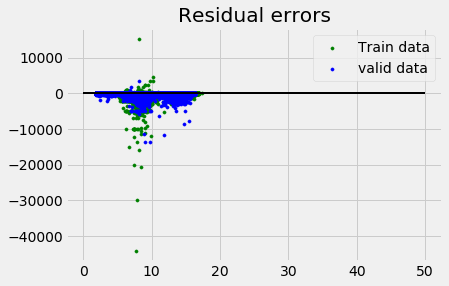

In [0]:
# plot for residual error 
Residual_errors(pred_train,pred_valid)

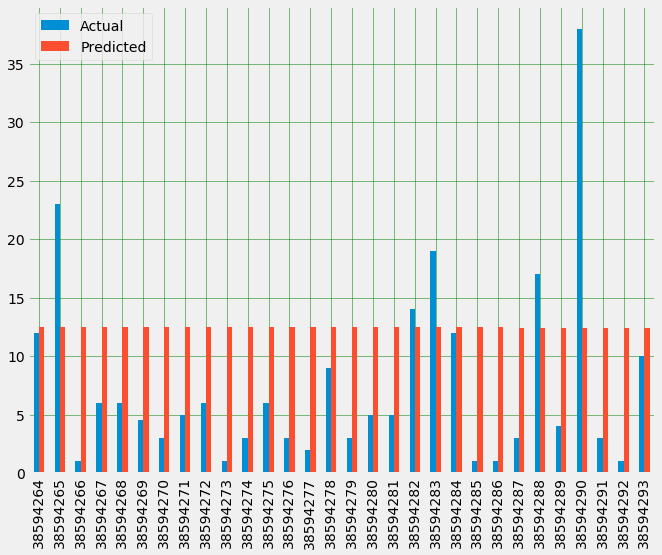

In [0]:
#plot the comparison of Actual and Predicted values
def actualVspredicted(pred_train) 

#### Ridge Regression

In [0]:
#Grid search for best alpha value
alphas = np.array([1,0.1,0.01,1.5,2,2.5,3]) #Pick the best of these values
# create and fit a ridge regression model, testing each alpha
model_ridge = Ridge()
grid = GridSearchCV(estimator=model_ridge, param_grid=dict(alpha=alphas),cv=10) #Here the argument cv=10 implies compute error
                                                                                #on 10 chucks of data and report average value
grid.fit(X_train,y_train)
print(grid)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.  , 0.1 , 0.01, 1.5 , 2.  , 2.5 , 3.  ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)


In [0]:
print(grid.best_estimator_.alpha)#print alpha 

1.0


In [0]:
# building a ridge regression with alpha=2
Ridge_model= Ridge(alpha=1.0,normalize=False)
Ridge_model,MAPEE_Ridge_T,MAPE_Ridge_V=model_fit_predict_print(Ridge_model)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
-------Train Error--------
               MSE:  530.0325
              RMSE:  23.0224
               MAE:  7.6845
              MAPE:  241.1982
-------Validation Error-----
               MSE:  456.0361
              RMSE:  21.355
               MAE:  7.638
              MAPE:  257.0501


In [0]:
#loading model into pickle file
#load_Pkl('Ridge_model',Ridge_model)
Ridge_model=open_Pkl('Ridge_model')

##### Lasso Regression  

In [0]:
model_lasso = Lasso()
grid = GridSearchCV(estimator=model_lasso, param_grid=dict(alpha=alphas),cv=10) #Here the argument cv=10 implies compute error on 10 chucks of data and report average value
grid.fit(X_train,y_train)
print(grid)

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.  , 0.1 , 0.01, 1.5 , 2.  , 2.5 , 3.  ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)


In [0]:
print(grid.best_estimator_.alpha)

1.0


In [0]:
Lasso_model= Lasso(alpha=1.0,normalize=False)
Lasso_model,MAPE_LASSO_T,MAPE_LASSO_V=model_fit_predict_print(Lasso_model)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
-------Train Error--------
               MSE:  531.7135
              RMSE:  23.0589
               MAE:  7.7305
              MAPE:  244.9548
-------Validation Error-----
               MSE:  458.8108
              RMSE:  21.4199
               MAE:  7.7425
              MAPE:  265.8261


In [0]:
#loading model into pickle file
#load_Pkl('Lasso_model',Lasso_model)
Lasso_model=open_Pkl('Lasso_model')
Lasso_model

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

#### Decision Tree Regressor

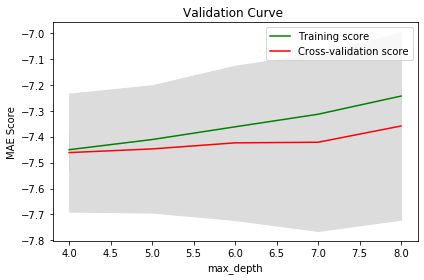

In [0]:
#Validation curve or Decision Tree
param_range = [4,5,6,7,8]
param_name='max_depth'
plt_validationCurve(DecisionTreeRegressor(),param_name,param_range)

There is a quite a bit bias at depth 4, and more variance as depth increases.


In [0]:
#Regression using Decision Tree
dtr = DecisionTreeRegressor(max_depth=4,criterion='mae',random_state=123)
DTR,MAPE_DT_T,MAPE_DT_V=model_fit_predict_print(dtr)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')
-------Train Error--------
               MSE:  522.2266
              RMSE:  22.8523
               MAE:  7.4504
              MAPE:  224.6741
-------Validation Error-----
               MSE:  449.3509
              RMSE:  21.1979
               MAE:  7.5145
              MAPE:  246.9877


In [0]:
#loading model into pickle file
#load_Pkl('model_DTR',DTR)
model_DTR=open_Pkl('model_DTR')

In [0]:
pred_train = model_DTR.predict(X_train)
pred_valid = model_DTR.predict(X_valid)  

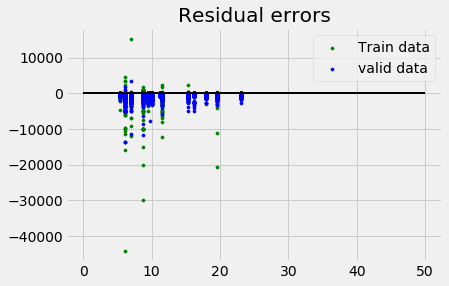

In [30]:
Residual_errors(pred_train,pred_valid)

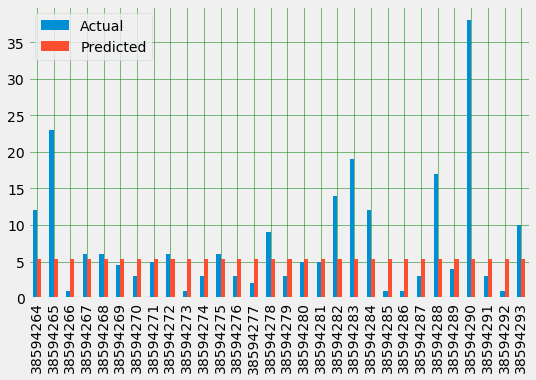

In [31]:
actualVspredicted(pred_train)

#### Random Forest Regressor

In [0]:
rfr = RandomForestRegressor(n_estimators =200,max_depth=4,random_state=345)
RFR,MAPE_RF_T,MAPE_RF_V=model_fit_predict_print(rfr)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=345, verbose=0, warm_start=False)
-------Train Error--------
               MSE:  522.1692
              RMSE:  22.851
               MAE:  7.4493
              MAPE:  224.7673
-------Validation Error-----
               MSE:  449.2706
              RMSE:  21.196
               MAE:  7.512
              MAPE:  246.9842


In [0]:
#loading final merged data into picle file
#load_Pkl('model_RFR',RFR)
model_RFR=open_Pkl('model_RFR')

In [0]:
pred_train = model_RFR.predict(X_train)
pred_valid = model_RFR.predict(X_valid)  

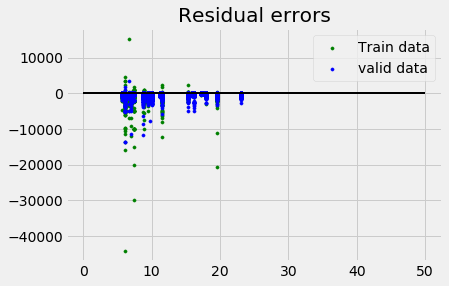

In [26]:
Residual_errors(pred_train,pred_valid)

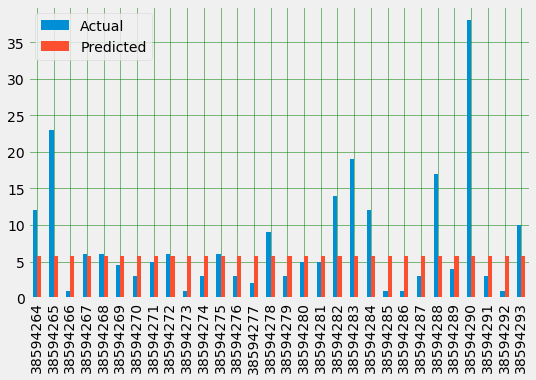

In [27]:
actualVspredicted(pred_train)

#### XGBOOST

In [10]:
xgb = XGBRegressor(random_state=6,n_estimators=15)
XGB,MAPE_XGB_T,MAPE_XGB_V=model_fit_predict_print(xgb)

[04:49:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:49:55] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=15,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=6,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
-------Train Error--------
               MSE:  524.1326
              RMSE:  22.4168
               MAE:  6.7606
              MAPE:  175.3566
-------Validation Error-----
     

In [0]:
#loading model into pickle file
load_Pkl('model_XGB',XGB)
#data=open_Pkl('model_XGB')

##### Hyper Parameter tuning for XGBoost

In [11]:
xgb = XGBRegressor(random_state=6,n_estimators=110,learning_rate=0.001)
XGB,MAPE_XGB_T,MAPE_XGB_V=model_fit_predict_print(xgb)

[21:36:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:14] WARNING: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.001, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=110,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=6,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
-------Train Error--------
               MSE:  582.5118
              RMSE:  23.6352
               

In [12]:
#load model to pickle file
#load_Pkl('model_XGB_100',XGB)
model_XGB_100=open_Pkl('model_XGB_100')

In [0]:
pred_train = model_XGB_100.predict(X_train)
pred_valid = model_XGB_100.predict(X_valid) 

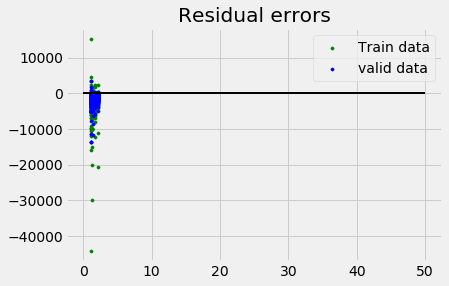

In [34]:
Residual_errors(pred_train,pred_valid)

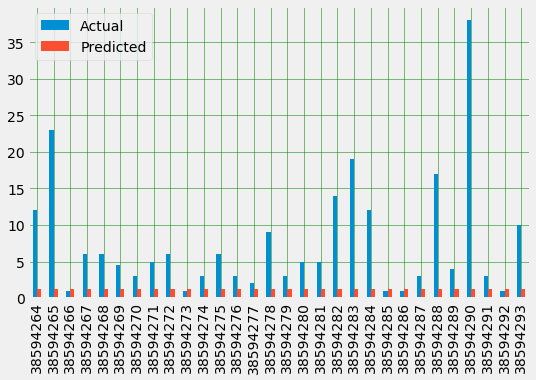

In [35]:
actualVspredicted(pred_train)

In [21]:
xgb = XGBRegressor(random_state=6,n_estimators=150,learning_rate=0.002)
XGB,MAPE_XGB_T,MAPE_XGB_V=model_fit_predict_print(xgb)

[23:55:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:55:58] WARNING: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.002, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=150,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=6,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
-------Train Error--------
               MSE:  564.0146
              RMSE:  23.3222
               

In [23]:
load_Pkl('model_XGB_150',XGB)
#data=open_Pkl('model_XGB_150')

##### ANN-MLP

In [9]:
#Random SPlit
scale = StandardScaler()
scale.fit(X_train)
X_train_std = scale.transform(X_train)
X_valid_std = scale.transform(X_valid)

In [8]:
#loading scaler to pickle file
#load_Pkl('scaler_for_test_PerfectSplit',scale)
#data=open_Pkl('scaler_for_test')

In [9]:
print(X_train.shape)
print(X_train_std.shape)
print(X_valid.shape)
print(X_valid_std.shape)

(44166159, 9)
(44166159, 9)
(18928355, 9)
(18928355, 9)


In [11]:
#Build MLP
model = Sequential()

model.add(Dense(30,input_shape=(9,), activation='relu', kernel_initializer='uniform'))
model.add(Dense(12, input_dim=30, activation='relu', kernel_initializer='uniform'))
model.add(Dense(7, input_dim=12, activation='relu', kernel_initializer='uniform'))
model.add(Dense(1, kernel_initializer='uniform', kernel_regularizer=regularizers.l2()))

## Callbacks
earlystopper = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(patience=5, verbose=1)

## Compiling the model and defining loss function
model.compile(optimizer='rmsprop', loss='mean_absolute_percentage_error')

## Training neural nets
model.fit(X_train_std, y_train, validation_data=(X_valid_std,y_valid), epochs=50, batch_size=1000000,callbacks=[reduce_lr, earlystopper])

Train on 44166159 samples, validate on 18928355 samples
Epoch 1/50
44166159/44166159 [==============================] - 85s 2us/step - loss: 97.2505 - val_loss: 92.3291
Epoch 2/50
44166159/44166159 [==============================] - 85s 2us/step - loss: 80.5751 - val_loss: 67.4620
Epoch 3/50
44166159/44166159 [==============================] - 85s 2us/step - loss: 63.9129 - val_loss: 62.6207
Epoch 4/50
44166159/44166159 [==============================] - 86s 2us/step - loss: 63.0639 - val_loss: 62.6289
Epoch 5/50
44166159/44166159 [==============================] - 86s 2us/step - loss: 62.8490 - val_loss: 61.6812
Epoch 6/50
44166159/44166159 [==============================] - 85s 2us/step - loss: 62.7521 - val_loss: 61.1786
Epoch 7/50
44166159/44166159 [==============================] - 85s 2us/step - loss: 62.6964 - val_loss: 60.9593
Epoch 8/50
44166159/44166159 [==============================] - 87s 2us/step - loss: 62.6655 - val_loss: 60.9387
Epoch 9/50
44166159/44166159 [==========

In [5]:
#loading model into pickle file
#load_Pkl('model_ANN_PerfectSplit_12_7',model)
model=open_Pkl('model_ANN_PerfectSplit_12_7')

In [10]:
train_pred = model.predict(X_train_std)#predicting on train
valid_pred = model.predict(X_valid_std)#predicting on validation

In [12]:
#falttening from array to list
train_pred=train_pred.flatten() 
valid_pred=valid_pred.flatten()

In [18]:
print(mean_absolute_percentage_error(y_train,train_pred))
print(mean_absolute_percentage_error(y_valid,valid_pred))

62.58400082588196
60.858798027038574


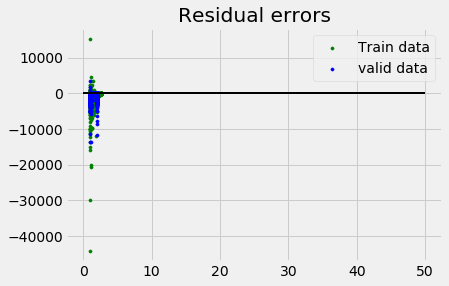

In [13]:
Residual_errors(train_pred,valid_pred)

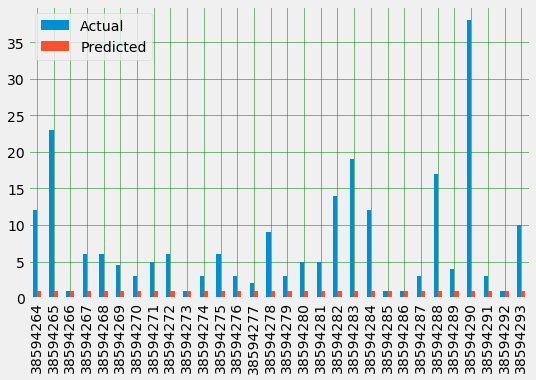

In [14]:
actualVspredicted(train_pred)

#### Pre Processing Traget Guided ordinal encoding for Item_ID and LocationID

In [8]:
#Load data
data=open_Pkl('train_update_woInf')
test=open_Pkl('test_date')

In [9]:
#Converting date to datetime and Extracting features from date
data['date']=pd.to_datetime(data['date'])

data['month']    =data['date'].dt.month #To capture monthly sales trend
data['dayofweek']=data['date'].dt.dayofweek #Since weekday and weekend sales trend
data['year']     =data['date'].dt.year#to capture yearly sales trend
data['week']     =data['date'].dt.week#to capture sesonality arocss weeks over year eg-Christmas week
data['day']      =data['date'].dt.day #to capture daily sales trend

#converting int64 to int8 to reduce memory
L=['month','dayofweek','week','day'] #dayofweek Mon-Sun ->0-6
for i in L:
    data[i]=data[i].astype('int8')
del L,i 
#convert year to int16
data['year']=data['year'].astype('int16')

#Since we have only two years dataconverting year to categorical.
data['year']=data['year'].astype('category')
data['year'] = data['year'].cat.add_categories("2019")#test data we have predict for 2019 since its not 
                                                                  #present in train we are adding a new level.
#drop data column after extracting all required information from date
data=data.drop(['date'], axis = 1)
data.dtypes

locationId     category
item_id        category
unit_sales      float16
onpromotion    category
month              int8
dayofweek          int8
year           category
week               int8
day                int8
dtype: object

In [10]:
cols=data.columns.tolist()
cols=['locationId','item_id','onpromotion','month','dayofweek','year','week','day','unit_sales']
data=data[cols]
del cols
data.head()

,locationId,item_id,onpromotion,month,dayofweek,year,week,day,unit_sales
38594264,25,103665,0,1,6,2017,52,1,12.0
38594265,25,105575,0,1,6,2017,52,1,23.0
38594266,25,108634,0,1,6,2017,52,1,1.0
38594267,25,108698,0,1,6,2017,52,1,6.0
38594268,25,108786,0,1,6,2017,52,1,6.0


In [12]:
#Creating a list of itemId's for encoding
data['item_id']=data['item_id'].astype('category') #converting Item ID to category
data_items_cats=data['item_id'].cat.categories.tolist()#list of all catgorical levels
print(len(data_items_cats))
test['item_id']=test['item_id'].astype('category') #converting Item ID to category
test_items_cats=test['item_id'].cat.categories.tolist()#list of all catgorical levels
print(len(test_items_cats))
new_ids=setdiff_sorted(test_items_cats,data_items_cats)
print(new_ids)
data_items_cats=data_items_cats+new_ids #adding New ItemID's from test to train for encoding
print(len(data_items_cats))

3887
3828
['2027559', '2043795', '2043849', '2045545']
3891


In [14]:
data['locationId']=data['locationId'].astype('category')#converting Item ID to category
data_loaction_cats=data['locationId'].cat.categories.tolist()#list of all catgorical levels
len(data_loaction_cats)

53

In [15]:
#For Target guides we need the Target variable.SO concatenate Y_train and X_train
#X_train['unit_sales']=y_train
# now we generate an ordered list with the labels (same as above but we capture the list in a variable)
data['item_id'] = data['item_id'].cat.add_categories(['2027559', '2043795', '2043849', '2045545'])#New Test ID's
ordered_labels = data.groupby(['item_id'])['unit_sales'].mean().sort_values().index
print(ordered_labels)
# and now we create a dictionary that maps each label to the number
ordinal_label = {k:i for i, k in enumerate(ordered_labels, 1)} 

CategoricalIndex(['638327', '1047793', '2011934', '1919674', '1935459',
                  '2016619', '2010444', '1991561', '2010574', '1985099',
                  ...
                  '583985', '1463864', '1503844', '1084365', '1239986',
                  '1976284', '2027559', '2043795', '2043849', '2045545'],
                 categories=['1000866', '1001305', '1003679', '1004545', '1004550', '1004551', '1005456', '1005458', ...], ordered=False, name='item_id', dtype='category', length=3891)


In [20]:
#load_Pkl('ordinal_label_itemID_original',ordinal_label)
ordinal_label_itemID=open_Pkl('ordinal_label_itemID_original')

In [17]:
#For Target guides we need the Target variable.SO concatenate Y_train and X_train
#X_train['unit_sales']=y_train
# now we generate an ordered list with the labels (same as above but we capture the list in a variable)
ordered_labels = data.groupby(['locationId'])['unit_sales'].mean().sort_values().index
print(ordered_labels)
# and now we create a dictionary that maps each label to the number
ordinal_label = {k:i for i, k in enumerate(ordered_labels, 1)} 

CategoricalIndex(['26', '32', '22', '30', '23', '10', '5', '1', '25', '16',
                  '12', '35', '15', '53', '14', '41', '18', '42', '13', '29',
                  '38', '4', '54', '21', '37', '19', '33', '34', '36', '2',
                  '27', '31', '39', '28', '20', '6', '43', '24', '17', '50',
                  '40', '9', '8', '7', '11', '48', '51', '46', '49', '47', '3',
                  '45', '44'],
                 categories=['1', '10', '11', '12', '13', '14', '15', '16', ...], ordered=False, name='locationId', dtype='category')


In [21]:
#load_Pkl('ordinal_label_locationID_original',ordinal_label)
ordinal_label_locationID=open_Pkl('ordinal_label_locationID_original')

In [22]:
data['item_id'] = data.item_id.map(ordinal_label_itemID) #Map itemID
data['locationId'] = data.locationId.map(ordinal_label_locationID)# Map Location ID

#Convert to Integer data type
data['item_id']=data['item_id'].astype('int32')
data['locationId']=data['locationId'].astype('int32')

In [23]:
#Dummfying Year and on promotion
cols_Dummies=['year','onpromotion'] # Columns to dummify
#Creating dummies for train Data
data=pd.get_dummies(columns=cols_Dummies,data=data,drop_first=True)

In [24]:
data.head()

,locationId,item_id,month,dayofweek,week,day,unit_sales,year_2018,year_2019,onpromotion_1
38594264,9,1484,1,6,52,1,12.0,0,0,0
38594265,9,3669,1,6,52,1,23.0,0,0,0
38594266,9,1553,1,6,52,1,1.0,0,0,0
38594267,9,1199,1,6,52,1,6.0,0,0,0
38594268,9,2872,1,6,52,1,6.0,0,0,0


In [31]:
#loading data into picle file
#load_Pkl('data_model_ordinal_original',data)
data=open_Pkl('data_model_ordinal_original')

In [32]:
#Train Validation split on data
X, y = data.loc[:,data.columns!='unit_sales'], data.loc[:,'unit_sales']
X_train, X_valid, y_train, y_valid = split_data(X, y)

In [31]:
reg = LinearRegression() 
  
LR,MAPE_LR_T,MAPE_LR_V=model_fit_predict_print(reg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
-------Train Error--------
               MSE:  483.0934
              RMSE:  21.9794
               MAE:  6.9492
              MAPE:  200.3596
-------Validation Error-----
               MSE:  414.0044
              RMSE:  20.3471
               MAE:  7.0061
              MAPE:  216.7826


In [32]:
load_Pkl('linear_ordinal',LR)

In [33]:
# 
xgb = XGBRegressor(random_state=6,n_estimators=120,learning_rate=0.001,reg_lambda = 0.01)
XGB,MAPE_XGB_T,MAPE_XGB_V=model_fit_predict_print(xgb)

[00:09:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:09:44] WARNING: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.001, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=120,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=6,
             reg_alpha=0, reg_lambda=0.01, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
-------Train Error--------
               MSE:  561.0843
              RMSE:  23.1789
            

In [34]:
load_Pkl('XGB_120_ordinal_reg',XGB)

In [12]:
xgb = XGBRegressor(random_state=6,n_estimators=150,learning_rate=0.001,reg_lambda = 0.01)
XGB,MAPE_XGB_T,MAPE_XGB_V=model_fit_predict_print(xgb)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[15:41:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:41:13] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.001, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=150,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=6,
             reg_alpha=0, reg_lambda=0.01, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
-------Train Error--------
               MSE:  553.3348
              RMSE:  23.0377
               MAE:  6.9969
              MAPE:  60.9946
-------Validation Error-----


In [0]:
load_Pkl('XGB_150_ordinal_reg',XGB)

In [8]:
xgb = XGBRegressor(random_state=6,n_estimators=170,learning_rate=0.001,reg_lambda = 0.01)
XGB,MAPE_XGB_T,MAPE_XGB_V=model_fit_predict_print(xgb)

[03:06:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:06:11] WARNING: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.001, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=170,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=6,
             reg_alpha=0, reg_lambda=0.01, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
-------Train Error--------
               MSE:  548.4118
              RMSE:  22.9317
            

In [33]:
#load_Pkl('XGB_170_ordinal_reg',XGB)
XGB=open_Pkl('XGB_170_ordinal_reg')

[18:36:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [34]:
train_pred = XGB.predict(X_train)#predicting on train
valid_pred = XGB.predict(X_valid)#predicting on validation

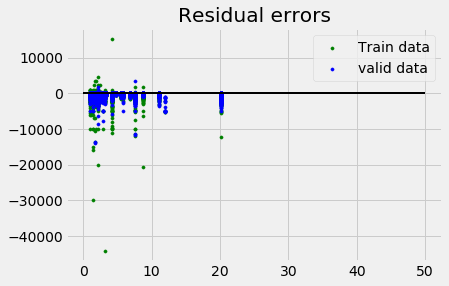

In [35]:
Residual_errors(train_pred,valid_pred)

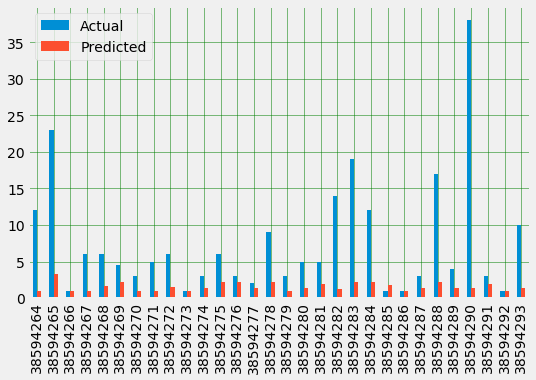

In [36]:
actualVspredicted(train_pred)

In [37]:
xgb = XGBRegressor(random_state=6,n_estimators=200,learning_rate=0.001,reg_lambda = 0.05)
XGB,MAPE_XGB_T,MAPE_XGB_V=model_fit_predict_print(xgb)

[09:34:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:34:06] WARNING: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.001, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=6,
             reg_alpha=0, reg_lambda=0.05, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
-------Train Error--------
               MSE:  541.3664
              RMSE:  22.7929
            

In [38]:
load_Pkl('XGB_200_ordinal_reg_0.05',XGB)

In [39]:
xgb = XGBRegressor(random_state=6,n_estimators=200,learning_rate=0.001,reg_lambda = 0.01)
XGB,MAPE_XGB_T,MAPE_XGB_V=model_fit_predict_print(xgb)

[13:51:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:51:56] WARNING: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.001, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=6,
             reg_alpha=0, reg_lambda=0.01, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
-------Train Error--------
               MSE:  541.3658
              RMSE:  22.7929
            

In [40]:
load_Pkl('XGB_200_ordinal_reg_0.01',XGB)

##### Removing returns from target guided ordinal dataset

In [23]:
#loading data into picle file
data=open_Pkl('data_model_ordinal_original')

In [24]:
data.loc[(data.unit_sales<0),'unit_sales'] = 1

In [25]:
data[data['unit_sales']==0]

,locationId,item_id,month,dayofweek,week,day,unit_sales,year_2018,year_2019,onpromotion_1


In [26]:
#Train Validation split on data
X, y = data.loc[:,data.columns!='unit_sales'], data.loc[:,'unit_sales']
X_train, X_valid, y_train, y_valid = split_data(X, y)

In [25]:
xgb = XGBRegressor(random_state=6,n_estimators=170,learning_rate=0.001,reg_lambda = 0.01)
XGB,MAPE_XGB_T,MAPE_XGB_V=model_fit_predict_print(xgb)

[10:14:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:14:07] WARNING: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.001, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=170,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=6,
             reg_alpha=0, reg_lambda=0.01, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
-------Train Error--------
               MSE:  541.0147
              RMSE:  22.7755
            

In [27]:
#load_Pkl('XGB_170_ordinal_reg_noreturns',XGB)
XGB=open_Pkl('XGB_170_ordinal_reg_noreturns')

[17:50:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [28]:
train_pred = XGB.predict(X_train)#predicting on train
valid_pred = XGB.predict(X_valid)#predicting on validation

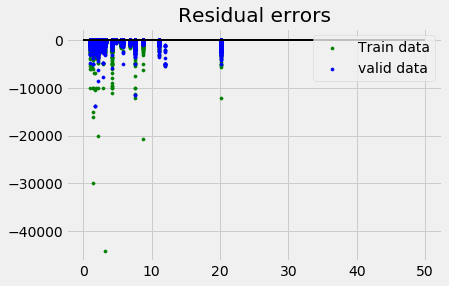

In [29]:
Residual_errors(train_pred,valid_pred)

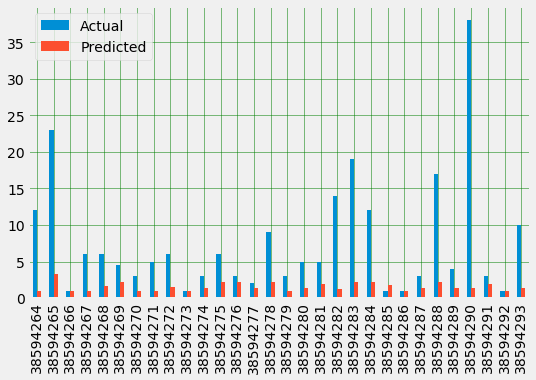

In [30]:
actualVspredicted(train_pred)

In [14]:
xgb = XGBRegressor(booster='gblinear',random_state=6,n_estimators=100,learning_rate=0.001,reg_lambda = 0.01)
XGB,MAPE_XGB_T,MAPE_XGB_V=model_fit_predict_print(xgb)

[17:58:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.001, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=6,
             reg_alpha=0, reg_lambda=0.01, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
-------Train Error--------
               MSE:  537.5072
              RMSE:  22.8145
               MAE:  6.3529
              MAPE:  105.2975
-------Validation Error-----
               MSE:  460.3624
              RMSE:  21.1927
               MAE:  6.2025
              MAPE:  139.2057


In [10]:
xgb = XGBRegressor(booster='gblinear',random_state=6,n_estimators=80,learning_rate=0.001,reg_lambda = 0.01)
XGB,MAPE_XGB_T,MAPE_XGB_V=model_fit_predict_print(xgb)

[18:43:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.001, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=80,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=6,
             reg_alpha=0, reg_lambda=0.01, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
-------Train Error--------
               MSE:  543.6244
              RMSE:  22.9416
               MAE:  6.3883
              MAPE:  91.565
-------Validation Error-----
               MSE:  465.9071
              RMSE:  21.352
               MAE:  6.0986
              MAPE:  117.66


##### Log transformation on unit sales

In [15]:
#Log transformation
data['unit_sales']=data['unit_sales'].apply(pd.np.log1p)

In [16]:
#Train Validation split on data
X, y = data.loc[:,data.columns!='unit_sales'], data.loc[:,'unit_sales']
X_train, X_valid, y_train, y_valid = split_data(X, y)

In [34]:
xgb = XGBRegressor(booster='gblinear',random_state=6,n_estimators=100,learning_rate=0.001,reg_lambda = 0.01)
XGB,MAPE_XGB_T,MAPE_XGB_V=model_fit_predict_print(xgb)

[14:09:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.001, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=6,
             reg_alpha=0, reg_lambda=0.01, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
-------Train Error--------
               MSE:  1.1894
              RMSE:  1.0289
               MAE:  0.8189
              MAPE:  41.6591
-------Validation Error-----
               MSE:  0.9327
              RMSE:  0.9395
               MAE:  0.7184
              MAPE:  41.0243


In [19]:
#load_Pkl('XGB_log',xgb)
xgb=open_Pkl('XGB_log')

[17:03:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [20]:
train_pred = xgb.predict(X_train)#predicting on train
valid_pred = xgb.predict(X_valid)#predicting on validation

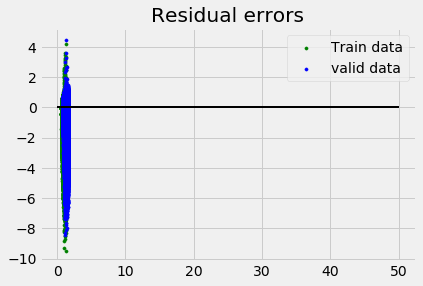

In [21]:
Residual_errors(train_pred,valid_pred)

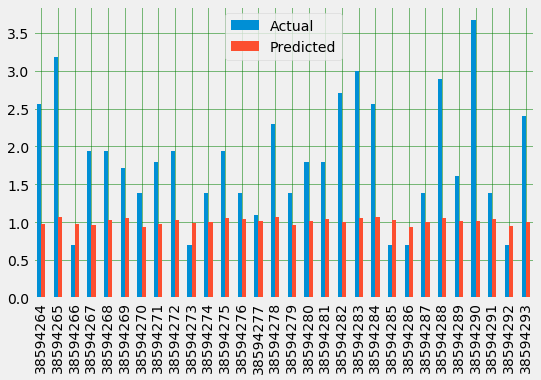

In [22]:
actualVspredicted(train_pred)

In [52]:
xgb = XGBRegressor(booster='gblinear',random_state=6,n_estimators=80,learning_rate=0.001,reg_lambda = 0.01)
XGB,MAPE_XGB_T,MAPE_XGB_V=model_fit_predict_print(xgb)

[15:51:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.001, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=80,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=6,
             reg_alpha=0, reg_lambda=0.01, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
-------Train Error--------
               MSE:  1.3227
              RMSE:  1.0898
               MAE:  0.8696
              MAPE:  42.8845
-------Validation Error-----
               MSE:  1.0583
              RMSE:  1.0033
               MAE:  0.7614
              MAPE:  40.7289


In [18]:
#load_Pkl('XGB_log_2',xgb)


##### Target guided ordinal without returns

In [11]:
#loading data into picle file
data=open_Pkl('data_model_ordinal_original')
test=open_Pkl('test_data_Reg_Ordinal')

In [12]:
data.loc[(data.unit_sales<0),'unit_sales'] = 1

In [13]:
#Creating a list of itemId's for encoding
data['item_id']=data['item_id'].astype('category') #converting Item ID to category
data_items_cats=data['item_id'].cat.categories.tolist()#list of all catgorical levels
print(len(data_items_cats))
test['item_id']=test['item_id'].astype('category') #converting Item ID to category
test_items_cats=test['item_id'].cat.categories.tolist()#list of all catgorical levels
print(len(test_items_cats))
new_ids=setdiff_sorted(test_items_cats,data_items_cats)
print(new_ids)
data_items_cats=data_items_cats+new_ids #adding New ItemID's from test to train for encoding
print(len(data_items_cats))

3887
3828
[3888, 3889, 3890, 3891]
3891


In [14]:
data['locationId']=data['locationId'].astype('category')#converting Item ID to category
data_loaction_cats=data['locationId'].cat.categories.tolist()#list of all catgorical levels
len(data_loaction_cats)

53

In [15]:
#For Target guides we need the Target variable.SO concatenate Y_train and X_train
#X_train['unit_sales']=y_train
# now we generate an ordered list with the labels (same as above but we capture the list in a variable)
data['item_id'] = data['item_id'].cat.add_categories(['3888', '3889', '3890', '3891'])#New Test ID's
ordered_labels = data.groupby(['item_id'])['unit_sales'].mean().sort_values().index
print(ordered_labels)
# and now we create a dictionary that maps each label to the number
ordinal_label = {k:i for i, k in enumerate(ordered_labels, 1)} 

CategoricalIndex([1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                  ...
                  3882, 3883, 3884, 3885, 3886, 3887, '3888', '3889', '3890',
                  '3891'],
                 categories=[1, 2, 3, 4, 5, 6, 7, 8, ...], ordered=False, name='item_id', dtype='category', length=3891)


In [19]:
#load_Pkl('ordinal_label_itemID_original_WOreturns',ordinal_label)
ordinal_label_itemID=open_Pkl('ordinal_label_itemID_original_WOreturns')

In [17]:
#For Target guides we need the Target variable.SO concatenate Y_train and X_train
#X_train['unit_sales']=y_train
# now we generate an ordered list with the labels (same as above but we capture the list in a variable)
ordered_labels = data.groupby(['locationId'])['unit_sales'].mean().sort_values().index
print(ordered_labels)
# and now we create a dictionary that maps each label to the number
ordinal_label = {k:i for i, k in enumerate(ordered_labels, 1)} 

CategoricalIndex([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
                  16, 18, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
                  31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,
                  46, 47, 48, 49, 50, 51, 52, 53],
                 categories=[1, 2, 3, 4, 5, 6, 7, 8, ...], ordered=False, name='locationId', dtype='category')


In [20]:
#load_Pkl('ordinal_label_locationID_original_WOreturns',ordinal_label)
ordinal_label_locationID=open_Pkl('ordinal_label_locationID_original_WOreturns')

In [21]:
data['item_id'] = data.item_id.map(ordinal_label_itemID) #Map itemID
data['locationId'] = data.locationId.map(ordinal_label_locationID)# Map Location ID

#Convert to Integer data type
data['item_id']=data['item_id'].astype('int32')
data['locationId']=data['locationId'].astype('int32')

In [6]:
#load_Pkl('data_ordinal_WOreturns',data)
data=open_Pkl('data_ordinal_WOreturns')

In [7]:
#Train Validation split on data
X, y = data.loc[:,data.columns!='unit_sales'], data.loc[:,'unit_sales']
X_train, X_valid, y_train, y_valid = split_data(X, y)

In [9]:
#XG Boost
xgb = XGBRegressor(booster='gblinear',random_state=6,n_estimators=50,learning_rate=0.001,reg_lambda = 0.01)
XGB,MAPE_XGB_T,MAPE_XGB_V=model_fit_predict_print(xgb)

[15:04:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.001, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=50,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=6,
             reg_alpha=0, reg_lambda=0.01, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
-------Train Error--------
               MSE:  555.9835
              RMSE:  23.1713
               MAE:  6.6085
              MAPE:  72.0334
-------Validation Error-----
               MSE:  478.2435
              RMSE:  21.6462
               MAE:  6.1259
              MAPE:  84.664


In [ ]:
load_Pkl('XGB_Noreturs_Ordinal',XGB)

In [11]:
train_pred = XGB.predict(X_train)#predicting on train
valid_pred = XGB.predict(X_valid)#predicting on validation

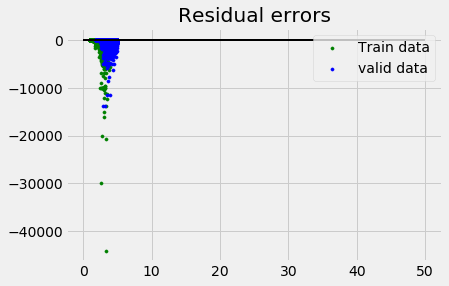

In [12]:
Residual_errors(train_pred,valid_pred)

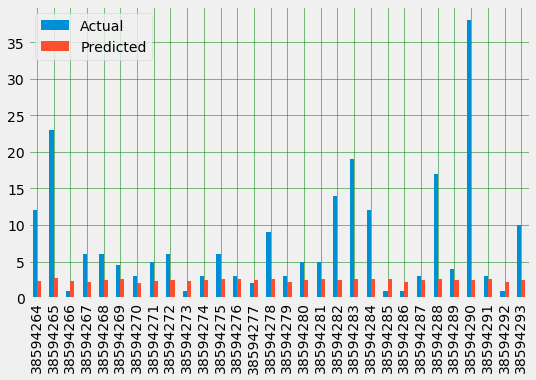

In [13]:
actualVspredicted(train_pred)

##### Consolidated results

In [7]:
#creating a list of train and validation errors on entire data normal encoding
Train_err  = [241.1982,241.1982,244.9548,224.6741,175.3566,224.7673,200.3596]
Valid_err  = [257.0501,257.0501,265.8261,246.9877,191.8766,246.9842,216.7826]
labels_err = ['LR','Ridge','Lasso','DT','XGBoost_15','RFR','LR-Ordinal']

In [8]:
#creating a list of train and validation errors on entire data ordinal encoding
train_err_ordinal  = [62.4106,70.0699,62.584,63.212,60.9946,60.1507,60.3152,60.3151]
valid_err_ordinal  = [60.9795,71.5661,60.858,61.7008,59.5798,58.8462,59.2626,59.2625]
labels_err_ordinal = ['XGB_110','XGB_150','ANN-MLP','XGB_120_0.001_0.01_ord','XGB_150_0,001_0.01_ord','XGB_170_0,001_0.01_ord',
                      'XGB_200_0,001_0.05_ord','XGB_200_0,001_0.01_ord']

In [9]:
##creating a list of train and validation errors on entire data ordinal encoding with no returns
labels_err_ordinal_Noreturns = ['XGB_170_0.001_0.01','XGB_100_0.001_0.01','XGB_80_0.001_0.01','XGB_100_0.001_0.01_log',
                                'XGB_80_0.001_0.01_log']
train_err_ordinal_Noreturns  = [60.1362,105.2975,91.565,41.6591,42.8845]
valid_err_ordinal_Noreturns  = [58.8107,139.2057,117.66,41.0243,40.7289]

In [10]:
# Creating a dataframe for all the metrics
Metrics_Compare                   = pd.DataFrame({"Model":labels_err,"Train_err":Train_err,"Valid_err":Valid_err})
Metrics_Compare_Ordinal           = pd.DataFrame({"Model":labels_err_ordinal,"Train_err":train_err_ordinal,
                                                  "Valid_err":valid_err_ordinal})
Metrics_Compare_Ordinal_Noreturns = pd.DataFrame({"Model":labels_err_ordinal_Noreturns,"Train_err":train_err_ordinal_Noreturns,
                                                  "Valid_err":valid_err_ordinal_Noreturns})

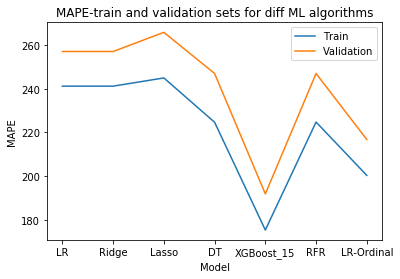

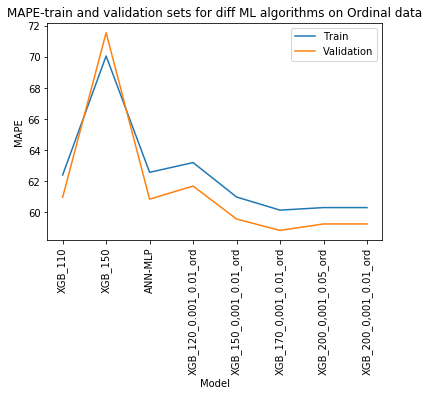

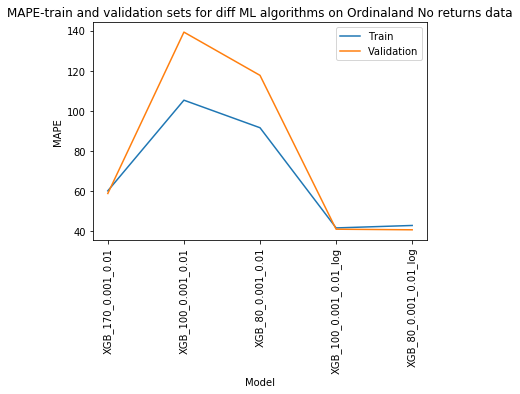

In [11]:
#Plotting the results
plt.figure(figsize=(6,4))
plt.plot(Metrics_Compare.Model, Metrics_Compare.Train_err, label = "Train")
# plotting the line 2 points 
plt.plot(Metrics_Compare.Model,Metrics_Compare.Valid_err, label = "Validation")
plt.xlabel('Model')
# Set the y axis label of the current axis.
plt.ylabel('MAPE')
# Set a title of the current axes.
plt.title('MAPE-train and validation sets for diff ML algorithms')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()


plt.figure(figsize=(6,4))
plt.plot(Metrics_Compare_Ordinal.Model, Metrics_Compare_Ordinal.Train_err, label = "Train")
# plotting the line 2 points 
plt.plot(Metrics_Compare_Ordinal.Model,Metrics_Compare_Ordinal.Valid_err, label = "Validation")
plt.xticks(rotation='vertical')
plt.xlabel('Model')
# Set the y axis label of the current axis.
plt.ylabel('MAPE')
# Set a title of the current axes.
plt.title('MAPE-train and validation sets for diff ML algorithms on Ordinal data')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()


plt.figure(figsize=(6,4))
plt.plot(Metrics_Compare_Ordinal_Noreturns.Model, Metrics_Compare_Ordinal_Noreturns.Train_err, label = "Train")
# plotting the line 2 points 
plt.plot(Metrics_Compare_Ordinal_Noreturns.Model,Metrics_Compare_Ordinal_Noreturns.Valid_err, label = "Validation")
plt.xticks(rotation='vertical')
plt.xlabel('Model')
# Set the y axis label of the current axis.
plt.ylabel('MAPE')
# Set a title of the current axes.
plt.title('MAPE-train and validation sets for diff ML algorithms on Ordinaland No returns data')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

Observation:

    XGBoost on Traget guided ordinal encoding on Item ID and Location ID with returns replace to 1 and log transformation on unit sales gave the lowest train and valisation error,but did not perform very well on test as per train and validation errors.
    
    XGBoost on Traget guided ordinal encoding on Item ID and Location ID with regularization gave better results on test data which is in sync with train and validation errors.

#### Test Data

In [0]:
#loading final merged data into picle file
test=open_Pkl('test_date')

In [0]:
#Replacing string with integer for on promotion
test['onpromotion']=test['onpromotion'].replace(['True'],1)
test['onpromotion']=test['onpromotion'].replace(['False'],0)
test['onpromotion']=test['onpromotion'].astype('str').astype('category')

#Converting date to datetime
test['date']=pd.to_datetime(test['date'])

test['month']    =test['date'].dt.month #To capture monthly sales trend
test['dayofweek']=test['date'].dt.dayofweek #Since weekday and weekend sales trend
test['year']     =test['date'].dt.year#to capture yearly sales trend
test['week']     =test['date'].dt.week#to capture sesonality arocss weeks over year eg-Christmas week
test['day']      =test['date'].dt.day #to capture daily sales trend

#converting int64 to int8 to reduce memory
L=['month','dayofweek','week','day'] #dayofweek Mon-Sun ->0-6
for i in L:
    test[i]=test[i].astype('int8')
del L,i 
test['year']=test['year'].astype('int16')

#drop data column after extracting all required information from date
test=test.drop(['date'], axis = 1)

In [0]:
#Using label encoder to encode item and location ID's

test['item_id']   = test['item_id'].map(dic_items)#Mapping item IDs
test['item_id']   = test['item_id'].astype('int32')
test['locationId']= test['locationId'].map(dic_loc)#mapping location IDs
test['locationId']= test['locationId'].astype('int32')#converting to int 

In [0]:
#Dummfying Year and on promotion
#cols_Dummies=['year','onpromotion'] # Columns to dummify
#Creating dummies for test Data
test=pd.get_dummies(columns=['year'],data=test,drop_first=False)
test=pd.get_dummies(columns=['onpromotion'],data=test,drop_first=True)

In [0]:
#get the columns of train and test
print("List of columns in train data:\n ",list(data.columns))
print("List of columns in Test data :\n ",list(test.columns))

List of columns in train data:
  ['locationId', 'item_id', 'month', 'dayofweek', 'week', 'day', 'unit_sales', 'year_2018', 'year_2019', 'onpromotion_1']
List of columns in Test data :
  ['locationId', 'item_id', 'month', 'dayofweek', 'week', 'day', 'year_2019', 'onpromotion_1']


In [0]:
#creating an new column as pr train data and setting to 0
test['year_2018']=0
test['year_2018']=test['year_2018'].astype('int8')

In [0]:
#get the intersection columns of train and valid
#print("List of columns in train data:\n ",list(data.columns))
print("List of columns in Test data :\n ",list(test.columns))

List of columns in Test data :
  ['locationId', 'item_id', 'month', 'dayofweek', 'week', 'day', 'year_2019', 'onpromotion_1', 'year_2018']


In [5]:
#loading final merged data into picle file
#load_Pkl('test_data_Reg',test)
test=open_Pkl('test_data_Reg')

In [6]:
cols=['locationId', 'item_id', 'month', 'dayofweek', 'week', 'day', 'year_2018', 'year_2019', 'onpromotion_1']
test=test[cols] #Arranging the cols as per train

In [23]:
#For ANN
#scale=open_Pkl('scaler_for_test')
#test_std = scale.transform(test)

In [7]:
#Loading model pickle file for predicting on test
model_XGB_100=open_Pkl('model_XGB_100')
y_test = model_XGB_100.predict(test)

[01:09:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [8]:
y_test
#y_test=y_test.flatten()#for ANN

array([1.305254 , 1.305254 , 1.305254 , ..., 1.1138054, 1.1138054,
       1.1138054], dtype=float32)

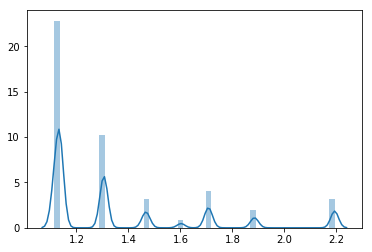

In [18]:
#Disstribution plot of predictions
sns.distplot(y_test)

In [20]:
#Create Submission
result = pd.DataFrame({'id':test.index, 'unit_sales': y_test})
result.to_csv('submission5.csv', index=False)
print('submission created')

submission created


##### Preprocessing test data for Ordinal Encoding

In [10]:
#loading dataset
test=open_Pkl('test_date')

In [11]:
#Replacing srings with numbers for onpromotion
test['onpromotion']=test['onpromotion'].replace(['True'],1)
test['onpromotion']=test['onpromotion'].replace(['False'],0)
test['onpromotion']=test['onpromotion'].astype('str').astype('category')

#Converting date to datetime
test['date']=pd.to_datetime(test['date'])

test['month']    =test['date'].dt.month #To capture monthly sales trend
test['dayofweek']=test['date'].dt.dayofweek #Since weekday and weekend sales trend
test['year']     =test['date'].dt.year#to capture yearly sales trend
test['week']     =test['date'].dt.week#to capture sesonality arocss weeks over year eg-Christmas week
test['day']      =test['date'].dt.day #to capture daily sales trend

#converting int64 to int8 to reduce memory
L=['month','dayofweek','week','day'] #dayofweek Mon-Sun ->0-6
for i in L:
    test[i]=test[i].astype('int8')
del L,i 
test['year']=test['year'].astype('int16')

#drop data column after extracting all required information from date
test=test.drop(['date'], axis = 1)

In [13]:
#Traget guided irdinal encoding on ItemID and Location ID as per train data
ordinal_label_itemID= open_Pkl('ordinal_label_itemID_original') #loading mappings from train
test['item_id']     = test['item_id'].map(ordinal_label_itemID)#Mapping ordinal item IDs
test['item_id']     = test['item_id'].astype('int32')

ordinal_label_locationID= open_Pkl('ordinal_label_locationID_original')#loading mappings from train
test['locationId']      = test['locationId'].map(ordinal_label_locationID)#Mapping ordinal location Ids
test['locationId']      = test['locationId'].astype('int32')#converting to int 

In [14]:
#Dummfying Year and on promotion
#cols_Dummies=['year','onpromotion'] # Columns to dummify
#Creating dummies for test Data
test=pd.get_dummies(columns=['year'],data=test,drop_first=False)
test=pd.get_dummies(columns=['onpromotion'],data=test,drop_first=True)

In [15]:
#get the columns of train and test
print("List of columns in train data:\n ",list(data.columns))
print("List of columns in Test data :\n ",list(test.columns))

List of columns in train data:
  ['locationId', 'item_id', 'month', 'dayofweek', 'week', 'day', 'unit_sales', 'year_2018', 'year_2019', 'onpromotion_1']
List of columns in Test data :
  ['locationId', 'item_id', 'month', 'dayofweek', 'week', 'day', 'year_2019', 'onpromotion_1']


In [16]:
test['year_2018']=0 #creating a new colum as per train and set to 0
test['year_2018']=test['year_2018'].astype('int8') #Converting to integer
cols=['locationId', 'item_id', 'month', 'dayofweek', 'week', 'day', 'year_2018', 'year_2019', 'onpromotion_1']#Cols as per train
test=test[cols] #Arranging the cols as per train

In [17]:
test.head()

,locationId,item_id,month,dayofweek,week,day,year_2018,year_2019,onpromotion_1
id,,,,,,,,,
0,9,1331,1,1,1,1,0,1,0
1,9,1484,1,1,1,1,0,1,0
2,9,3447,1,1,1,1,0,1,0
3,9,2506,1,1,1,1,0,1,0
4,9,2285,1,1,1,1,0,1,0


In [15]:
#load_Pkl('test_data_Reg_Ordinal',test)
test=open_Pkl('test_data_Reg_Ordinal') #Final pre processed test data file for ordinal encoding

In [16]:
#Loading model pickle file for predicting on test
XGB_170_ordinal_reg=open_Pkl('XGB_170_ordinal_reg')
y_test = XGB_170_ordinal_reg.predict(test)

[13:18:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [48]:
#for log transformation algorithms
#y_test=np.expm1(y_test)

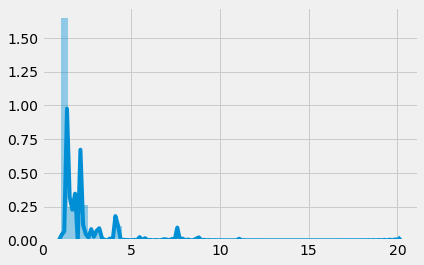

In [39]:
#Distribution of predictions
sns.distplot(y_test)

In [40]:
#Create Submission
result = pd.DataFrame({'id':test.index, 'unit_sales': y_test})
result.to_csv('submission9.csv', index=False)
print('submission created')

submission created


In [51]:
result.shape

(1482295, 2)

#### EDA on test data

In [17]:
#load required datsets
test=open_Pkl('test_Date')
df_item=open_Pkl('item_update')
df_location=open_Pkl('location_update')

In [18]:
 #Adding unit sales from best model predictions
test['unit_sales']=y_test

In [19]:
#Merging test with item details
test_item=test.join(df_item.set_index(['item_id']), on=['item_id'])
#Merging test,item details with location
test_item_location=test_item.join(df_location.set_index(['location_id']), on=['locationId'])

In [20]:
#extractind features from date
test_item_location['date']     =pd.to_datetime(test_item_location['date'])
test_item_location['week']     =test_item_location['date'].dt.week

In [21]:
##Operations team Questions

Text(0.5,1,'sales per cluster')

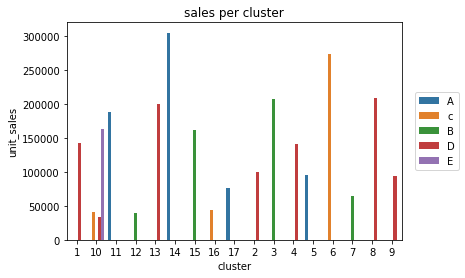

In [22]:
#to check which cluster has highest sales sales
test_cluster=test_item_location.groupby(['cluster','type'])['unit_sales'].sum().reset_index().sort_values('unit_sales') #cluster and type with highest sales
test_cluster=test_cluster.dropna() #drop na

test_cluster['type'] = test_cluster.type.cat.rename_categories({1: 'D',
                                                                2: 'c',
                                                                3: 'B',
                                                                4: 'E',
                                                                5: 'A'})

#Plot
fig=sns.barplot(x='cluster',y='unit_sales',hue='type',data=test_cluster)
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.title("sales per cluster")

Text(0.5,1,'Top selling items in the cluster')

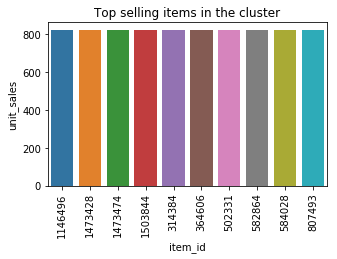

In [23]:
#to check top 10 selling items under cluster 25
test_topitems_cluster=test_item_location[ (test_item_location['cluster']=='14')] #Subsetting Cluster 14
test_cluster_top=test_topitems_cluster.groupby(['item_id'])['unit_sales'].sum().reset_index() #No of items sold per item
test_cluster_top=test_cluster_top.sort_values('unit_sales',ascending=False) #Sort
test_cluster_top=test_cluster_top.head(10) #sunsetting top 10 highest selling items

#Plot
plt.figure(figsize=(5,3))
fig=sns.barplot(x='item_id',y='unit_sales',data=test_cluster_top)
fig=fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
plt.title("Top selling items in the cluster")

Text(0.5,1,'rate of purchase of top 10 items')

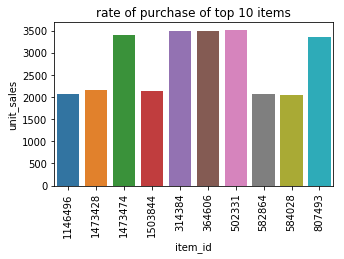

In [24]:
#rate of purchase of top 10 items per week.
L=test_cluster_top['item_id'].tolist() #creating a list of top 10 item Id's
top_items_week=test_item_location[test_item_location['item_id'].isin(L)] #subsetting top 10 items

top_items_week=top_items_week.groupby('item_id')['unit_sales'].sum().reset_index() #no of units sold of top 10 items
top_items_week=top_items_week.sort_values('unit_sales',ascending=False)# Sort
top_items_week=top_items_week.query('unit_sales > 0') #subsetting only the sum

top_items_week['unit_sales']=top_items_week['unit_sales']/2 #Freq of purchase per week

#Plot
plt.figure(figsize=(5,3))
fig=sns.barplot(x='item_id',y='unit_sales',data=top_items_week)
fig=fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
plt.title("rate of purchase of top 10 items")

In [25]:
top_items_week

,item_id,unit_sales
6,502331,3508.906250
4,314384,3501.343262
5,364606,3501.343262
2,1473474,3410.584961
9,807493,3355.171143
1,1473428,2150.887207
3,1503844,2133.575439
0,1146496,2062.600586
7,582864,2062.600586
8,584028,2055.037598


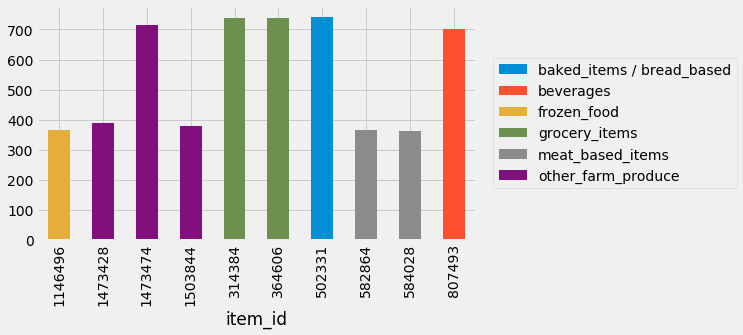

In [191]:
#Check the which category these items belong to
cat_items=test_item_location[test_item_location['item_id'].isin(L)]#subsetting only top 10 items
cols=['item_id','category_of_item'] 
cat_items=cat_items[cols] #dataframe with only item Ids and their category
dict_cat_items=open_Pkl('dict_cat_items') #dictionary with category o items mappings
cat_items['category_of_item']=cat_items['category_of_item'].map(dict_cat_items) #Mapping the category items
cat_items['item_id']=cat_items['item_id'].astype('category') #converting item_id to category

x=pd.crosstab(cat_items['item_id'], cat_items['category_of_item']) #contingency table to shoe the relation between two categorical variables
#Plot
x.plot.bar(figsize = (7,4), stacked=True)
plt.legend(title='cluster vs Type')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.show()

Observations:

    1.Cluster 14 belonging to Business Type A will have highest sales from 01-01-2019 to 15-01-2019.
    2.['502331','584028','314384','1503844','582864','364606','1146496','1473428','1473474','807493'] These are the top 
    selling items of the cluster.

Models Used for predicting unit sales:

    Used Linear regression,Decision Tree,Random Forest,XG Boost and MLP.
    
    Choose to use these algorithms as they are compuatationally fast ,Random Forest and XG Boost are ensemble methods which are a combination of multiple Decision Tress and usually known for giving better results. XG Boost is comapratively Fast and for this dataset in particual XGBoost with regularization gave comapratively better results.
    
    In MLP we can do batch processing,by choosing write parameters it converges faster. 

Summary & Conclusion:
    
    Small Basket should try to reduce the on the number of returs to improve its sales as it is evident that the number of returns on perishable goos have increased drastically from 2017 to 2018.Its eveident that the returns are high on perishable goods.It would help Small Basket if they have stringent filtering of perishable goods to maintain quality so the returns might come down.
    New Item ID's appeared in the test data.Looks like Small Basket has introduced new items and these were not reflected in items.csv.For any future references it will be helpful if the new items are updated and shared as when when they are added so we train the Machine Learning Algorithm accordingly so that it will not fail on any new item Ids that appear on the go.
    